In [1]:
# ============================================
# || import all necessary libraries         ||
# ============================================

import numpy as np
#import matplotlib.pyplot as plt
import random
import time
#from typing import Dict, List, Tuple, Any
#import sys
#import os

# Utilities
from utils.data import get_fixed_data
from utils.visualization import plot_results, plot_experiment_results, plot_cost_histogram, compare_policies

# Task 0

Optimal cost: 442.75


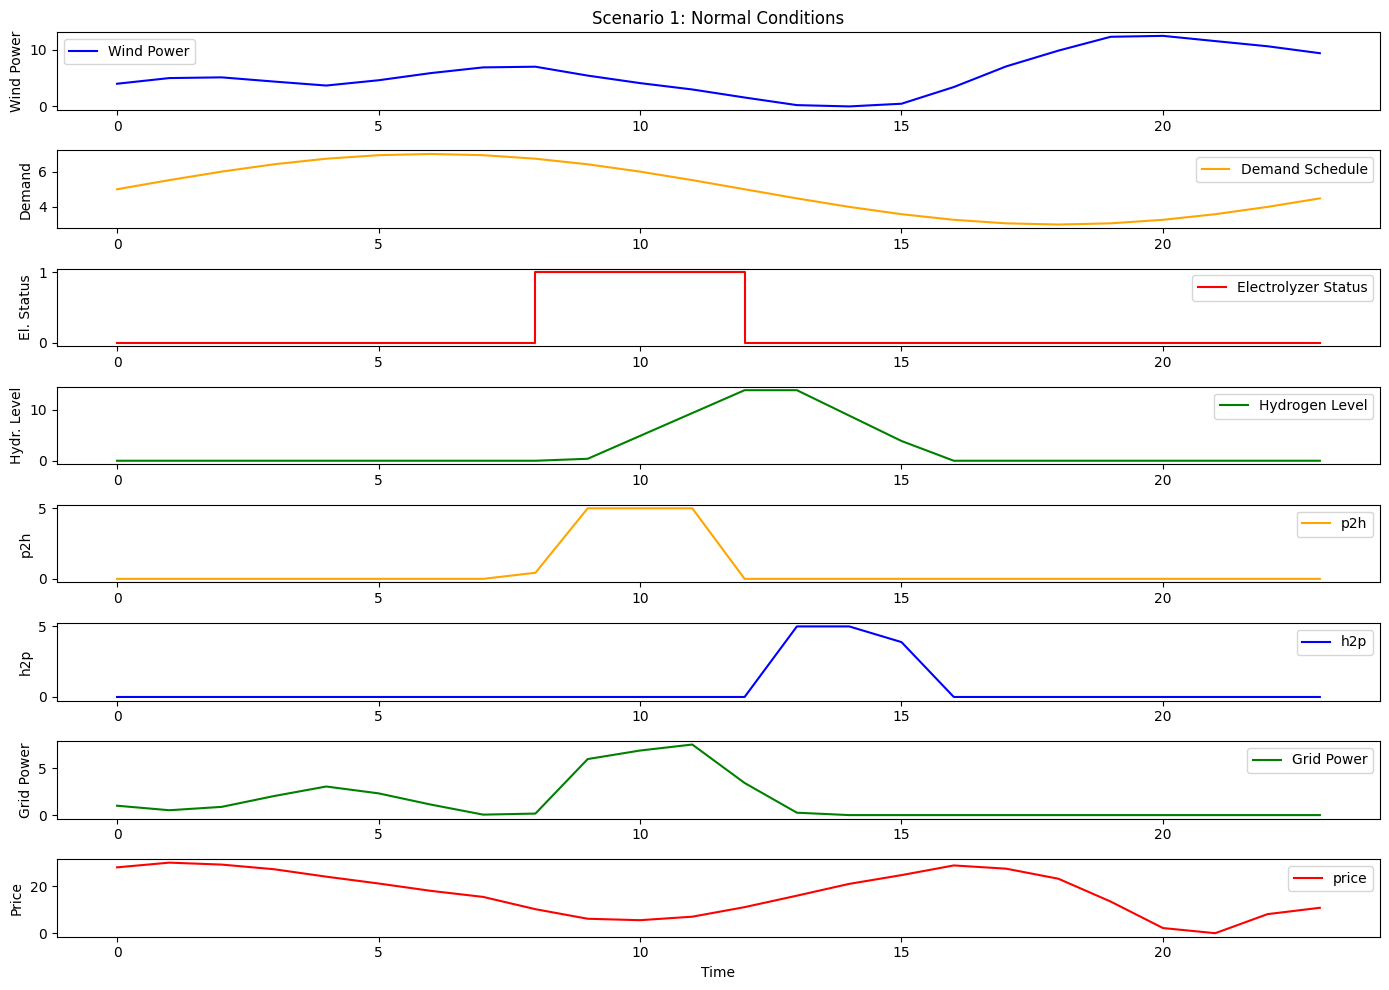

Optimal cost: 43.53


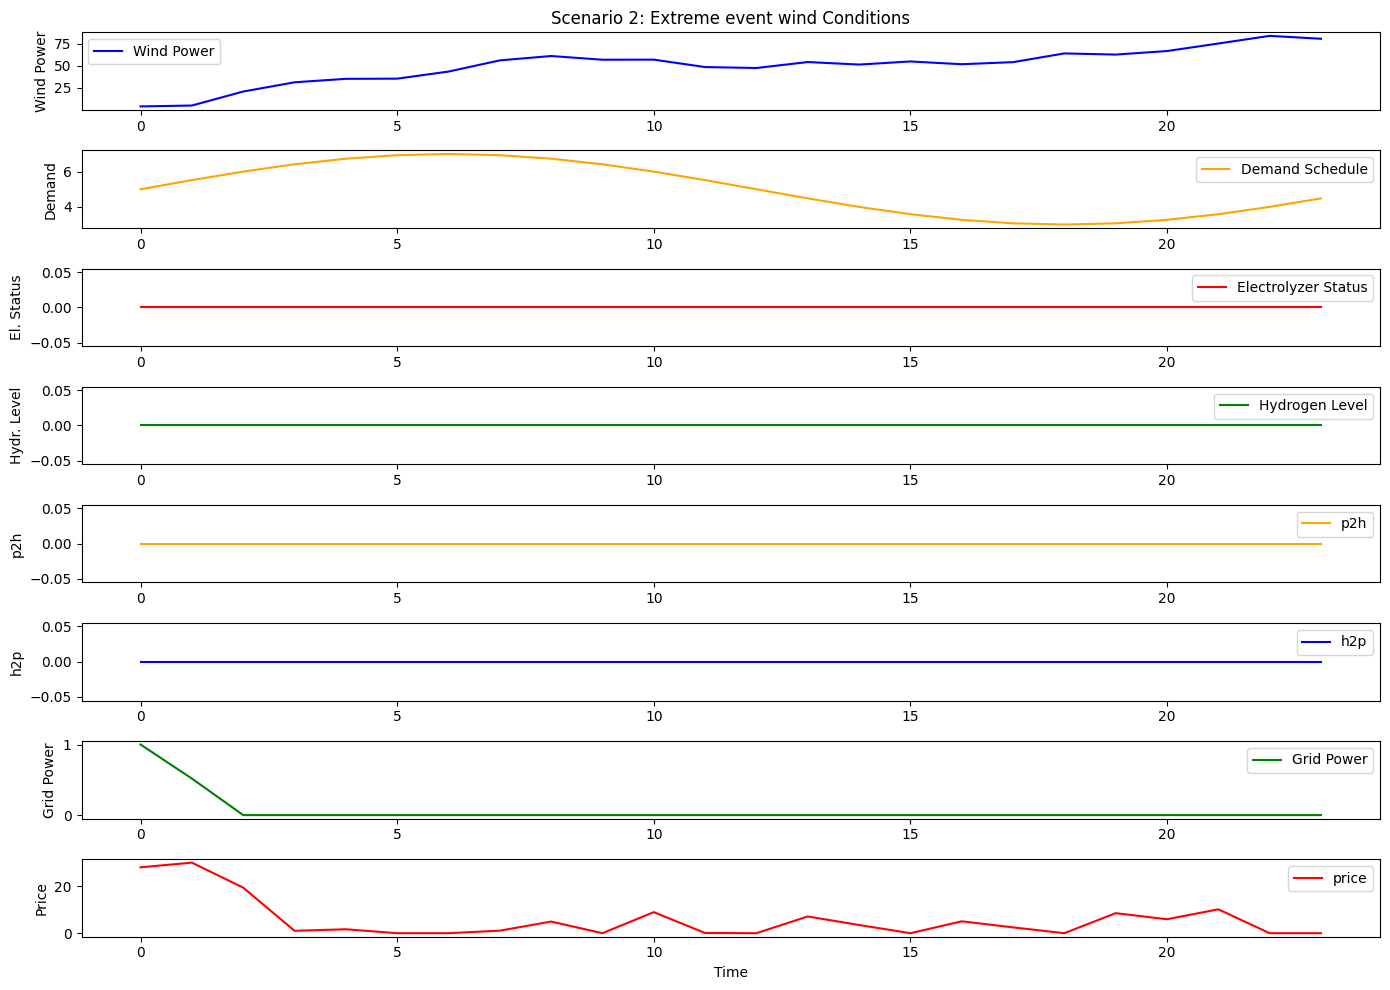

In [2]:
from task_0.helper_functions import generate_trajectories, solve_milp

def main() -> None:
    data = get_fixed_data()
    
    # First scenario - Normal conditions
    wind1, price1 = generate_trajectories(data)
    results1 = solve_milp(wind1, price1, data, False)
    plot_results(wind1, price1, results1, data, "Scenario 1: Normal Conditions")

    # Second scenario - More volatile conditions?
    data_volatile = data.copy()
    data_volatile['extreme_event_prob_wind'] = 0.8

    wind2, price2 = generate_trajectories(data_volatile)
    results2 = solve_milp(wind2, price2, data, False)
    plot_results(wind2, price2, results2, data, "Scenario 2: Extreme event wind Conditions")
random.seed(1234)
main()

# Task 1

ENERGY HUB MDP EVALUATION

Evaluating Dummy Policy over 20 experiments...
Processing experiment 0...
Processing experiment 5...
Processing experiment 10...
Processing experiment 15...
Average policy cost: 530.19
Min cost: 135.74, Max cost: 1059.32
Dummy Policy Results:
Average Cost: 530.19
Min Cost: 135.74
Max Cost: 1059.32
Evaluation Time: 0.00 seconds

Generating visualizations...

Generating visualizations for Dummy Policy...


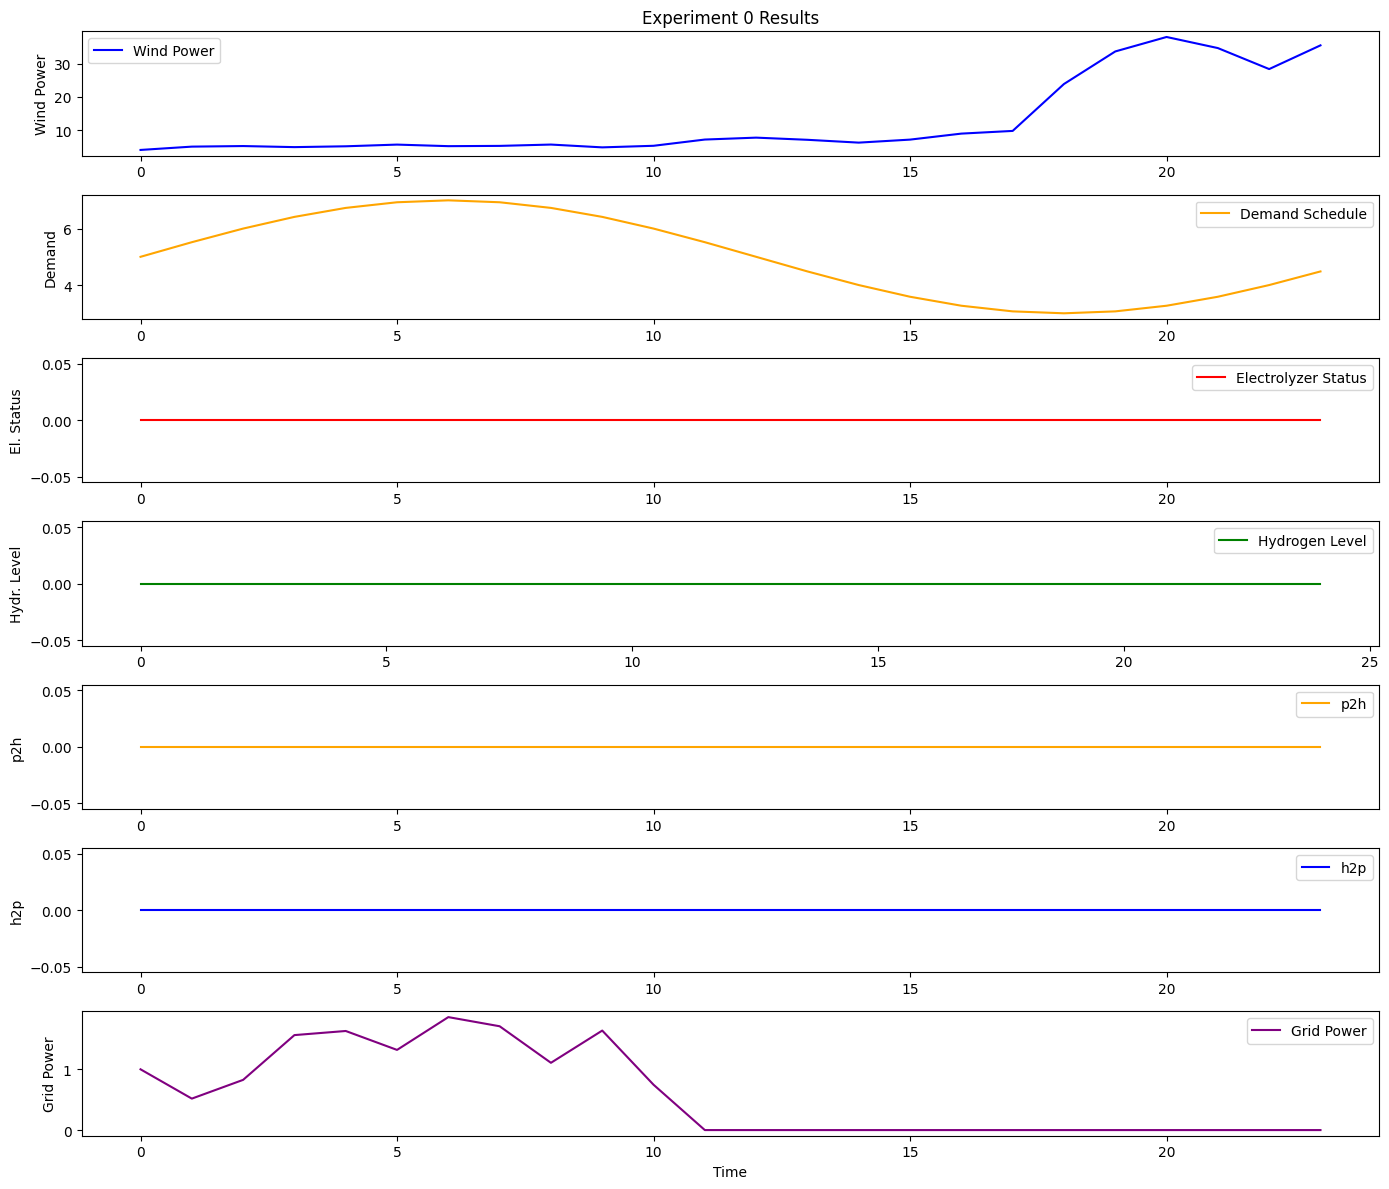

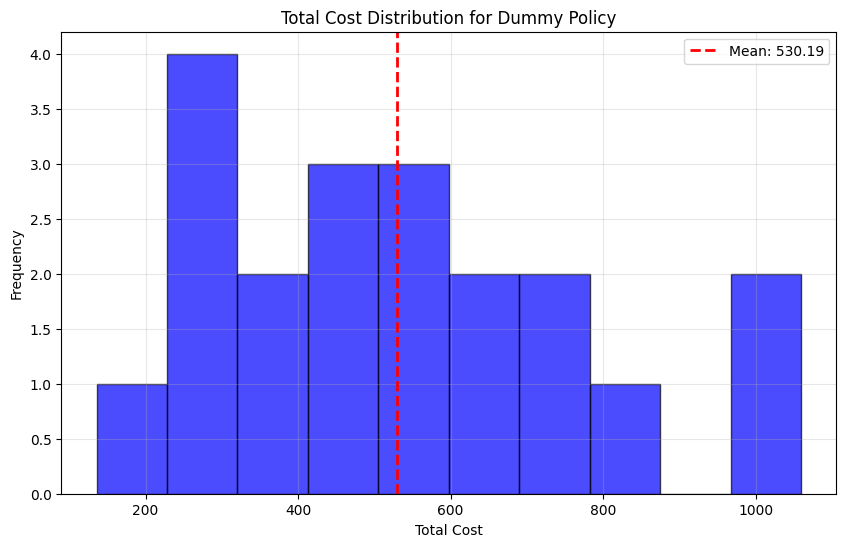


Evaluation completed successfully!


In [7]:
from task_1.evaluation_framework import evaluate_policy, create_experiments
from task_1.energy_hub_policies import dummy_policy


def main():
    data = get_fixed_data()
    
    print("=" * 50)
    print("ENERGY HUB MDP EVALUATION")
    print("=" * 50)
    num_experiments = 20
    policy_results = {}
    policies = {
        "Dummy Policy": dummy_policy
    }
    expers, wind_trajectories, price_trajectories = create_experiments(num_experiments, data)
    # Evaluate each policy
    for policy_name, policy_func in policies.items():
        print(f"\nEvaluating {policy_name} over {num_experiments} experiments...")
        start_time = time.time()
        
        avg_cost, results = evaluate_policy(policy_func,data, expers, wind_trajectories, price_trajectories, num_experiments, _debug=True)
        #avg_cost, results = evaluate_policy(policy_func, num_experiments=num_experiments)
        
        elapsed_time = time.time() - start_time
        
        print(f"{policy_name} Results:")
        print(f"Average Cost: {avg_cost:.2f}")
        print(f"Min Cost: {np.min(results['total_costs']):.2f}")
        print(f"Max Cost: {np.max(results['total_costs']):.2f}")
        print(f"Evaluation Time: {elapsed_time:.2f} seconds")
        
        # Store the results
        policy_results[policy_name] = results
    
    print("\nGenerating visualizations...")
    
    for policy_name, results in policy_results.items():
        print(f"\nGenerating visualizations for {policy_name}...")
        
        plot_experiment_results(results, experiment_index=0, data=data) # just the first experiment
        
        plot_cost_histogram(results, policy_name=policy_name) # histogram of total costs over all experiments
    
    print("\nEvaluation completed successfully!")
    
    return policy_results

if __name__ == "__main__":
    policy_results = main()

# Task 2

# Tuning the parameters for the Stochastic Program. 
## Looping over look ahead horizon, branches and clustering method. 

In [2]:
total_variables = 1000
V = 3

# Generate SP policy configurations
sp_policies = {}
for L in range(3, 6):
    for B in range(2, 10):
        if V * L * (B ** (L - 1)) > total_variables:
            print(f"Skipping: L={L}, B={B} (exceeds total variables)")
            continue
        print(f"Creating SP Policy: L={L}, B={B}")

Creating SP Policy: L=3, B=2
Creating SP Policy: L=3, B=3
Creating SP Policy: L=3, B=4
Creating SP Policy: L=3, B=5
Creating SP Policy: L=3, B=6
Creating SP Policy: L=3, B=7
Creating SP Policy: L=3, B=8
Creating SP Policy: L=3, B=9
Creating SP Policy: L=4, B=2
Creating SP Policy: L=4, B=3
Creating SP Policy: L=4, B=4
Skipping: L=4, B=5 (exceeds total variables)
Skipping: L=4, B=6 (exceeds total variables)
Skipping: L=4, B=7 (exceeds total variables)
Skipping: L=4, B=8 (exceeds total variables)
Skipping: L=4, B=9 (exceeds total variables)
Creating SP Policy: L=5, B=2
Skipping: L=5, B=3 (exceeds total variables)
Skipping: L=5, B=4 (exceeds total variables)
Skipping: L=5, B=5 (exceeds total variables)
Skipping: L=5, B=6 (exceeds total variables)
Skipping: L=5, B=7 (exceeds total variables)
Skipping: L=5, B=8 (exceeds total variables)
Skipping: L=5, B=9 (exceeds total variables)


In [3]:
from task_2.helper_functions import create_ev_policy, create_sp_policy
from task_1.evaluation_framework import evaluate_policy, create_experiments
from task_1.energy_hub_policies import dummy_policy
def main():
    data = get_fixed_data()
    
    print("=" * 70)
    print("TASK 2: STOCHASTIC PROGRAMMING POLICIES FOR ENERGY HUB MANAGEMENT")
    print("=" * 70)
    
    num_experiments = 20
    
    policy_results = {} # store results
    ev_policy_config = create_ev_policy(horizon=3, num_samples=1000)

    total_variables = 1000
    V = 3

    # Generate SP policy configurations
    sp_policies = {}
    for L in range(3, 6):
        for B in range(2, 10):
            if V * L * (B ** (L - 1)) > total_variables:
                print(f"Skipping: L={L}, B={B} (exceeds total variables)")
                continue
            print(f"Creating SP Policy: L={L}, B={B}")
            policy_key_kmeans = f"SP Policy (H={L}, S={B}, Clustering=kmeans)"
            policy_key_kmedoids = f"SP Policy (H={L}, S={B}, Clustering=kmedoids)"
            sp_policies[policy_key_kmeans] = create_sp_policy(horizon=L, branches_per_stage=B, clustering_method='kmeans')
            sp_policies[policy_key_kmedoids] = create_sp_policy(horizon=L, branches_per_stage=B, clustering_method='kmedoids')


    # Define all policies
    policies = {
        "Dummy Policy": dummy_policy,
         "EV Policy (H=3)": ev_policy_config,
        **sp_policies,  # Add all SP policies dynamically
    }
    expers, wind_trajectories, price_trajectories = create_experiments(num_experiments, data)
    for policy_name, policy_func in policies.items():
        print(f"\n{'-' * 50}")
        print(f"Evaluating: {policy_name}")
        print(f"{'-' * 50}")
        
        start_time = time.time()
        
        try:
            avg_cost, results = evaluate_policy(policy_func, data, expers, wind_trajectories, price_trajectories, num_experiments, _debug=True)
            
            elapsed_time = time.time() - start_time
            
            print(f"\nResults for {policy_name}:")
            print(f"Average Cost: {avg_cost:.2f}")
            print(f"Min Cost: {np.min(results['total_costs']):.2f}")
            print(f"Max Cost: {np.max(results['total_costs']):.2f}")
            print(f"Standard Deviation: {np.std(results['total_costs']):.2f}")
            print(f"Evaluation Time: {elapsed_time:.2f} seconds")
            policy_results[policy_name] = results
            
        except Exception as e:
            print(f"Error evaluating {policy_name}: {e}")

if __name__ == "__main__":
    main()

TASK 2: STOCHASTIC PROGRAMMING POLICIES FOR ENERGY HUB MANAGEMENT
Creating SP Policy: L=3, B=2
Creating SP Policy: L=3, B=3
Creating SP Policy: L=3, B=4
Creating SP Policy: L=3, B=5
Creating SP Policy: L=3, B=6
Creating SP Policy: L=3, B=7
Creating SP Policy: L=3, B=8
Creating SP Policy: L=3, B=9
Creating SP Policy: L=4, B=2
Creating SP Policy: L=4, B=3
Creating SP Policy: L=4, B=4
Skipping: L=4, B=5 (exceeds total variables)
Skipping: L=4, B=6 (exceeds total variables)
Skipping: L=4, B=7 (exceeds total variables)
Skipping: L=4, B=8 (exceeds total variables)
Skipping: L=4, B=9 (exceeds total variables)
Creating SP Policy: L=5, B=2
Skipping: L=5, B=3 (exceeds total variables)
Skipping: L=5, B=4 (exceeds total variables)
Skipping: L=5, B=5 (exceeds total variables)
Skipping: L=5, B=6 (exceeds total variables)
Skipping: L=5, B=7 (exceeds total variables)
Skipping: L=5, B=8 (exceeds total variables)
Skipping: L=5, B=9 (exceeds total variables)

---------------------------------------------

Processing experiment 5...
Processing experiment 10...
Processing experiment 15...
Average policy cost: 557.35
Min cost: 80.05, Max cost: 1370.47

Results for EV Policy (H=3):
Average Cost: 557.35
Min Cost: 80.05
Max Cost: 1370.47
Standard Deviation: 374.30
Evaluation Time: 19.98 seconds

--------------------------------------------------
Evaluating: SP Policy (H=3, S=2, Clustering=kmeans)
--------------------------------------------------
Processing experiment 0...
Processing experiment 5...
Processing experiment 10...
Processing experiment 15...
Average policy cost: 579.27
Min cost: 74.46, Max cost: 1370.47

Results for SP Policy (H=3, S=2, Clustering=kmeans):
Average Cost: 579.27
Min Cost: 74.46
Max Cost: 1370.47
Standard Deviation: 377.78
Evaluation Time: 39.19 seconds

--------------------------------------------------
Evaluating: SP Policy (H=3, S=2, Clustering=kmedoids)
--------------------------------------------------
Processing experiment 0...
Processing experiment 5...
Proce

/Users/khs/code/DMUU/.venv/lib/python3.12/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


Processing experiment 5...
Processing experiment 10...
Hydrogen availability constraint violated: 1.7014085614537837 > 1.7014085614537788
DECISION DOES NOT MEET THE CONSTRAINTS FOR EXPERIMENT 12, TIMESLOT 23. THE DUMMY POLICY WILL BE USED INSTEAD
Hydrogen availability constraint violated: 1.055533235845676 > 1.055533235845673
DECISION DOES NOT MEET THE CONSTRAINTS FOR EXPERIMENT 13, TIMESLOT 17. THE DUMMY POLICY WILL BE USED INSTEAD
Processing experiment 15...
Hydrogen availability constraint violated: 0.46588492618038924 > 0.465884926180387
DECISION DOES NOT MEET THE CONSTRAINTS FOR EXPERIMENT 15, TIMESLOT 23. THE DUMMY POLICY WILL BE USED INSTEAD
Hydrogen availability constraint violated: 0.7730973458618164 > 0.7730973458618139
DECISION DOES NOT MEET THE CONSTRAINTS FOR EXPERIMENT 17, TIMESLOT 23. THE DUMMY POLICY WILL BE USED INSTEAD
Hydrogen availability constraint violated: 2.056002449834712 > 0.0
DECISION DOES NOT MEET THE CONSTRAINTS FOR EXPERIMENT 19, TIMESLOT 20. THE DUMMY POL

TASK 2: STOCHASTIC PROGRAMMING POLICIES FOR ENERGY HUB MANAGEMENT

--------------------------------------------------
Evaluating: Dummy Policy
--------------------------------------------------
Processing experiment 0...
Processing experiment 5...
Processing experiment 10...
Processing experiment 15...
Average policy cost: 615.38
Min cost: 124.29, Max cost: 1438.44

Results for Dummy Policy:
Average Cost: 615.38
Min Cost: 124.29
Max Cost: 1438.44
Standard Deviation: 433.58
Evaluation Time: 0.00 seconds

--------------------------------------------------
Evaluating: EV Policy (H=3)
--------------------------------------------------
Processing experiment 0...
Processing experiment 5...
Processing experiment 10...
Processing experiment 15...
Average policy cost: 598.38
Min cost: 124.29, Max cost: 1424.57

Results for EV Policy (H=3):
Average Cost: 598.38
Min Cost: 124.29
Max Cost: 1424.57
Standard Deviation: 431.32
Evaluation Time: 19.47 seconds

------------------------------------------

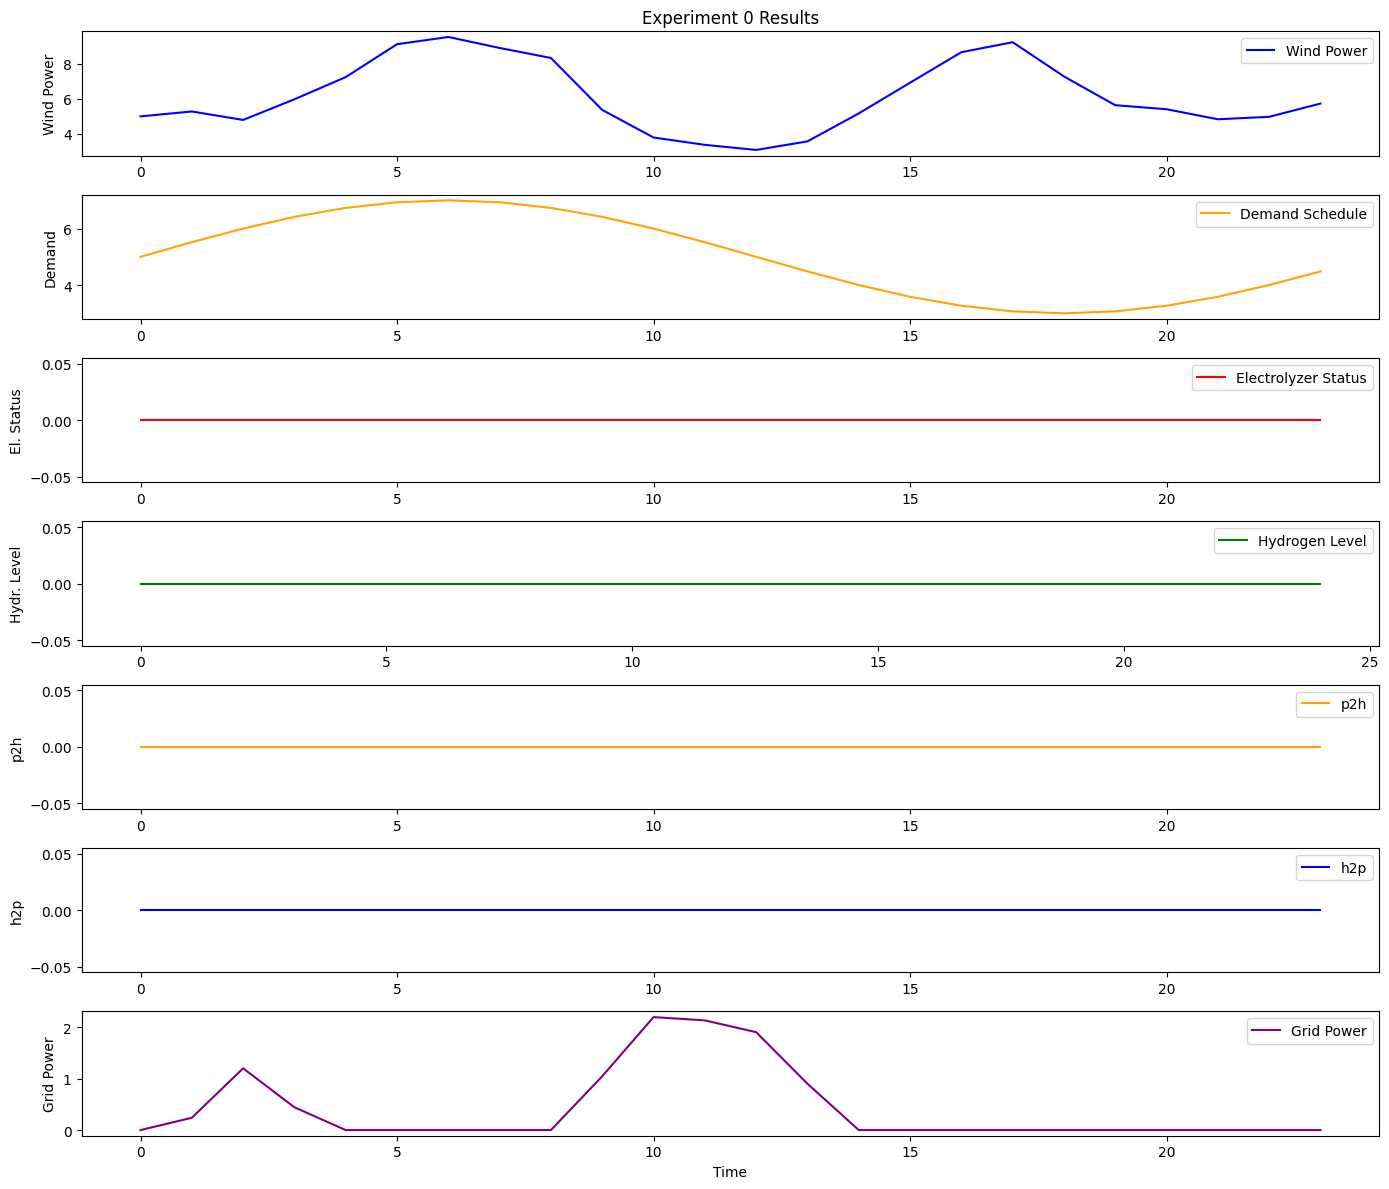

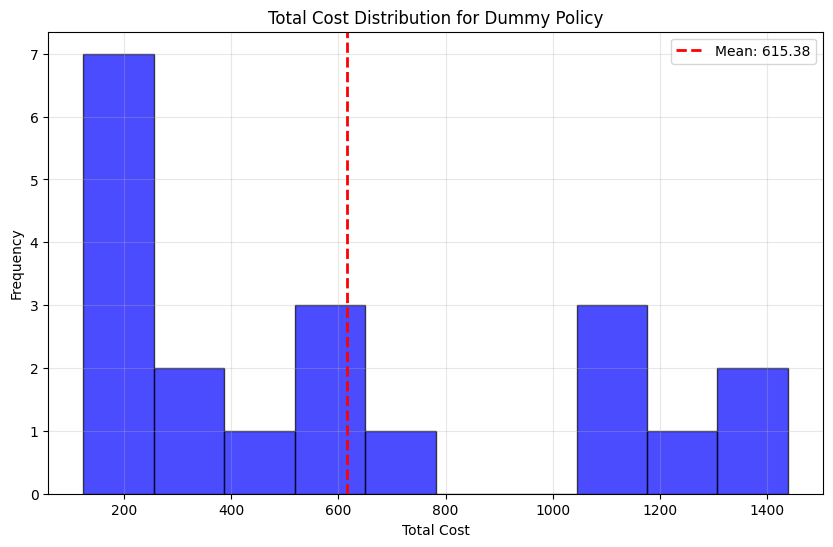


Visualizing results for EV Policy (H=3)...


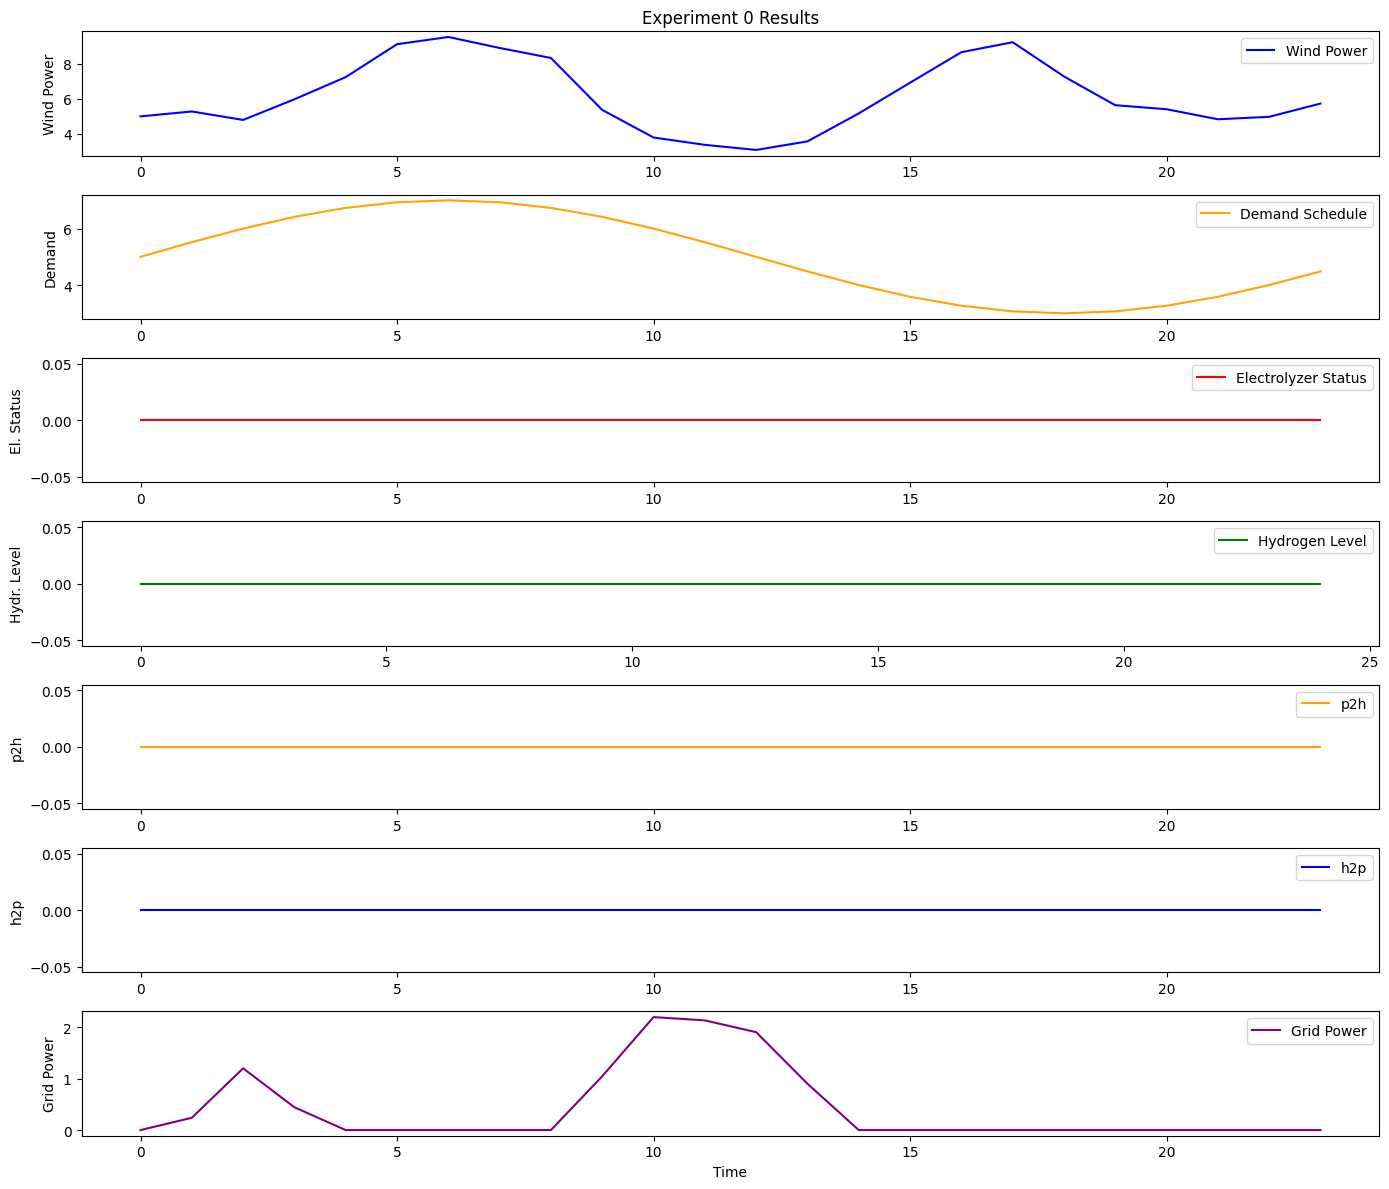

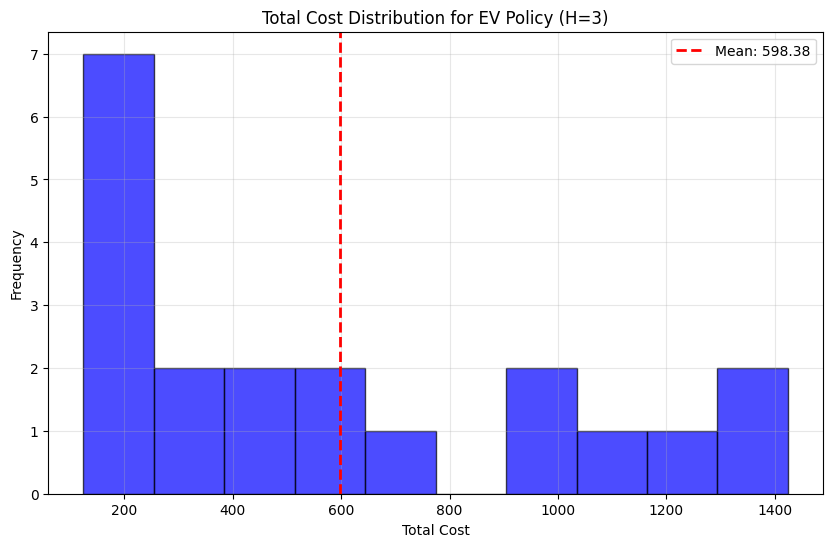


Visualizing results for SP Policy (H=5, S=2)...


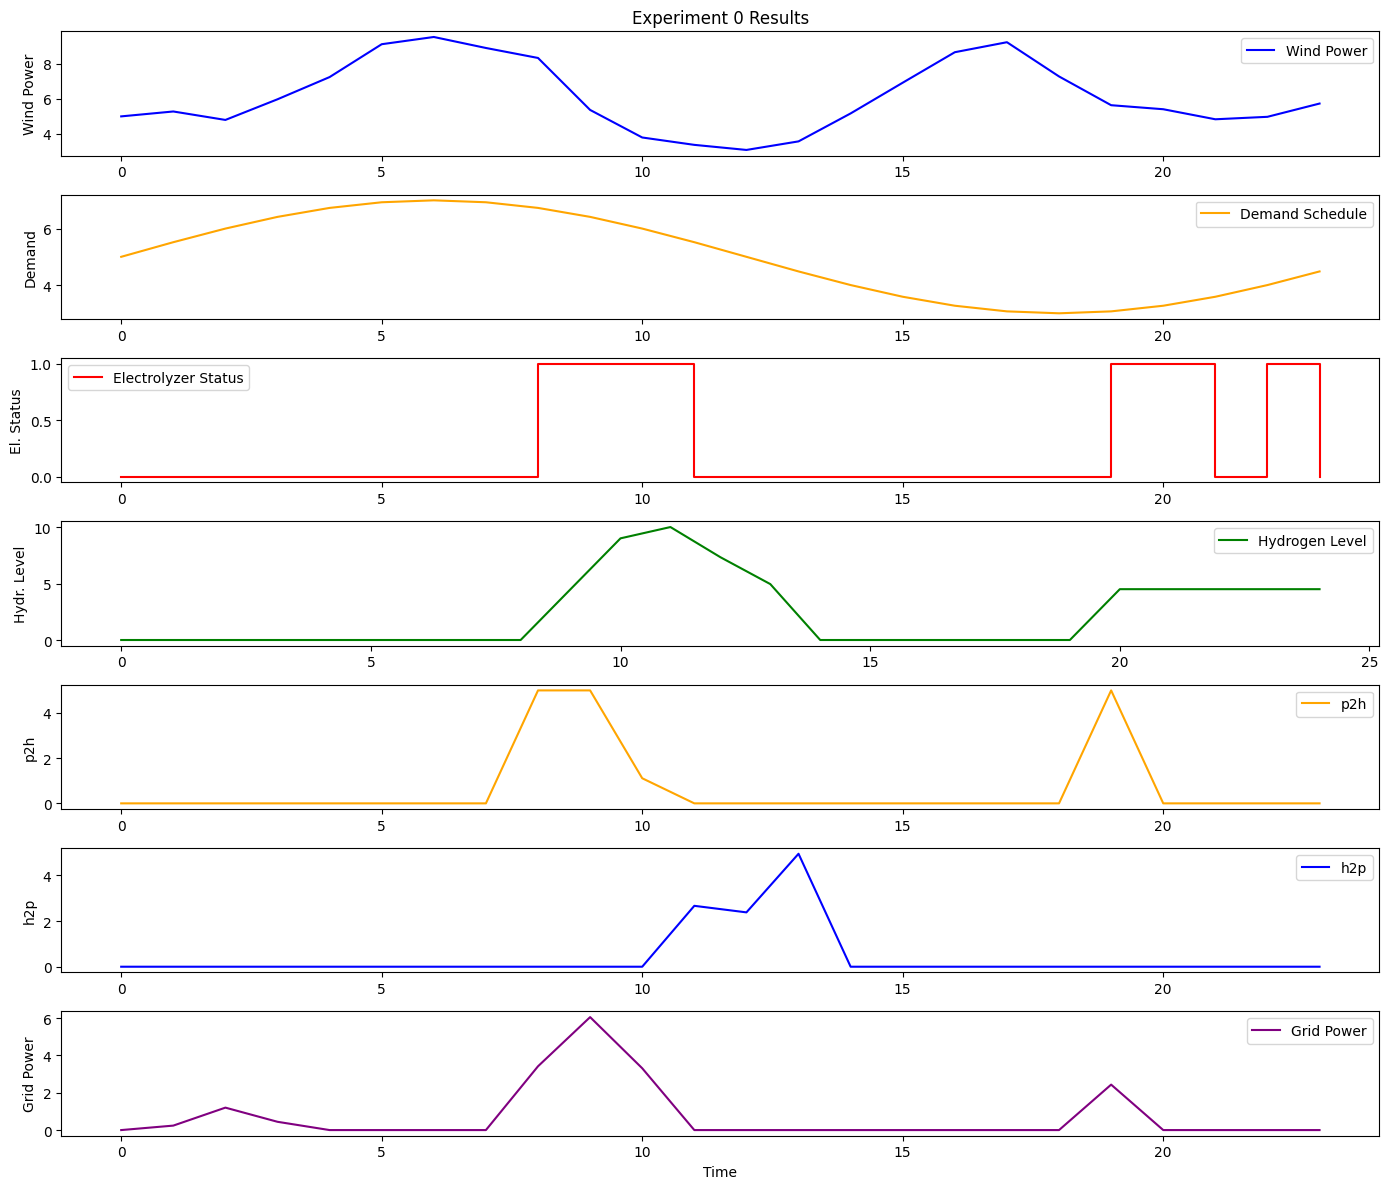

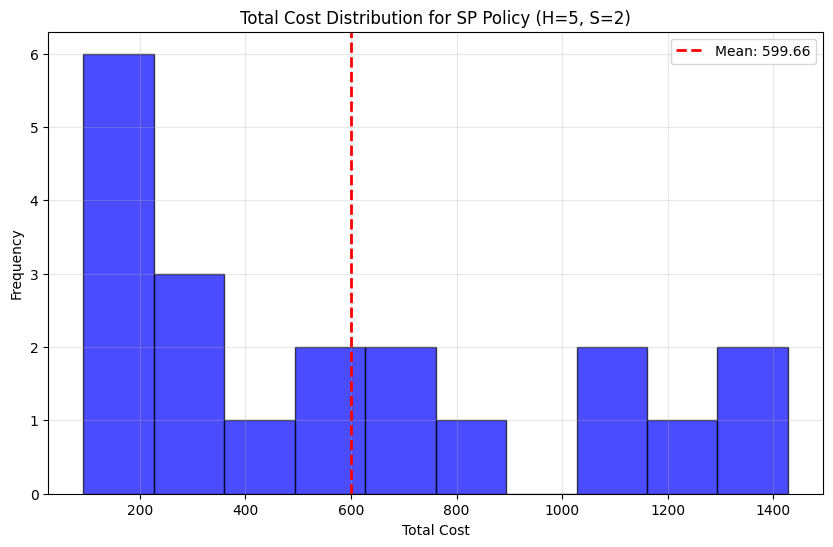


Visualizing results for SP Policy (H=3, S=6)...


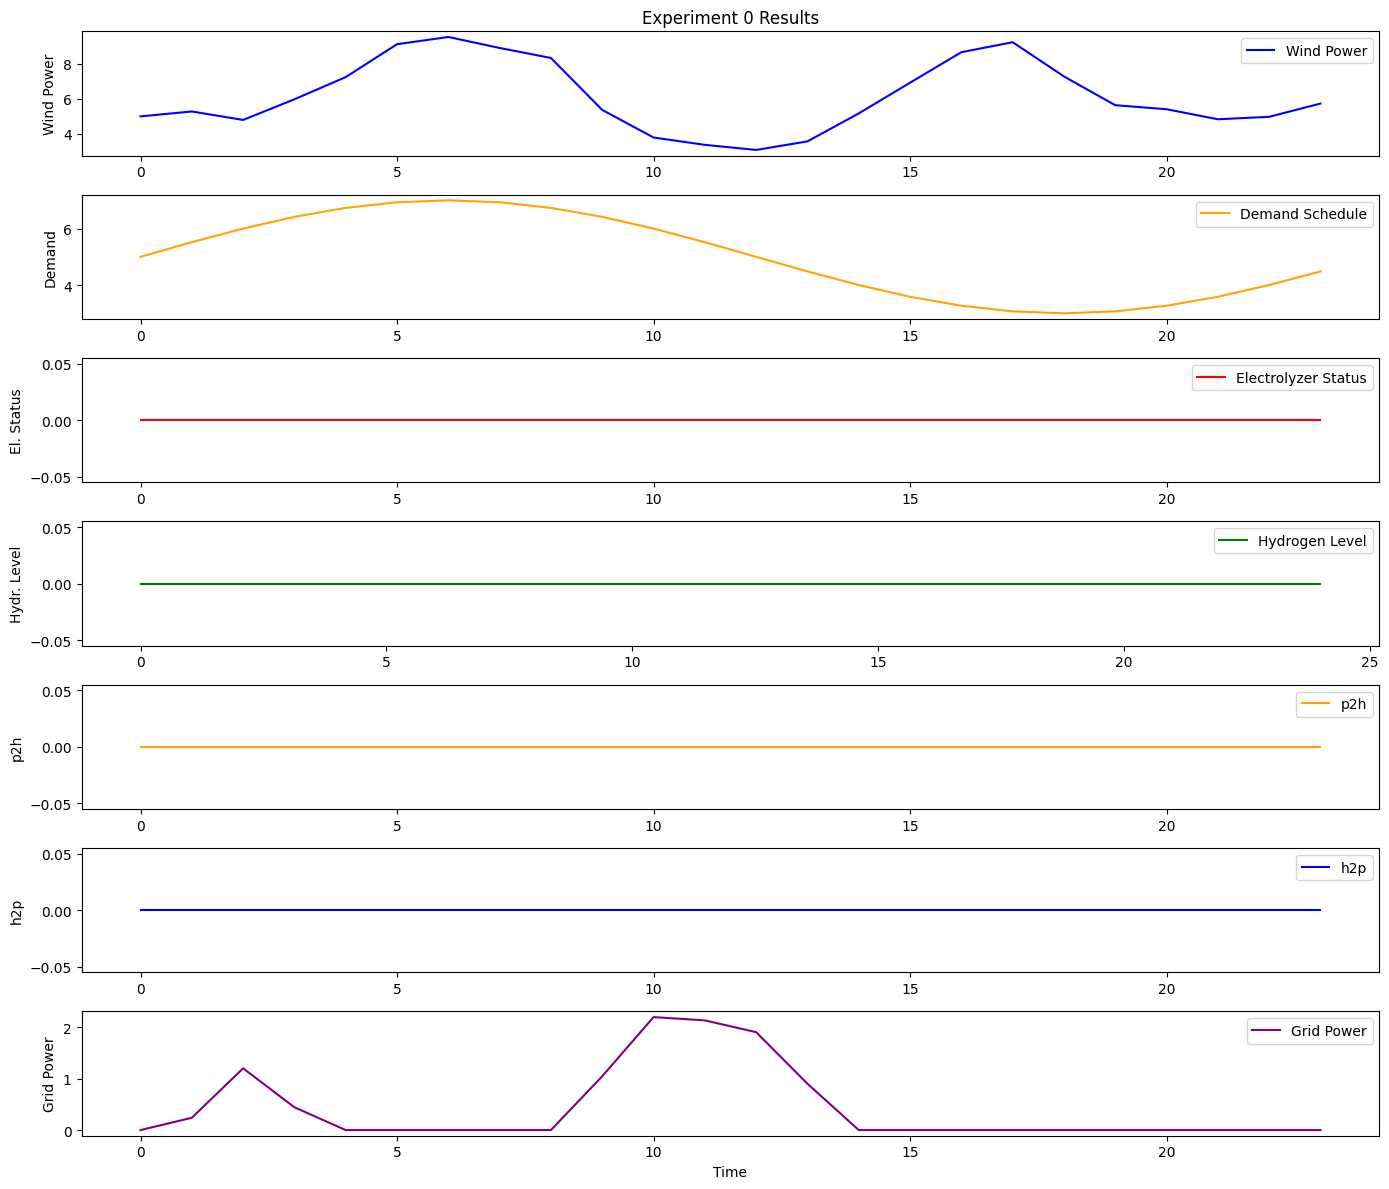

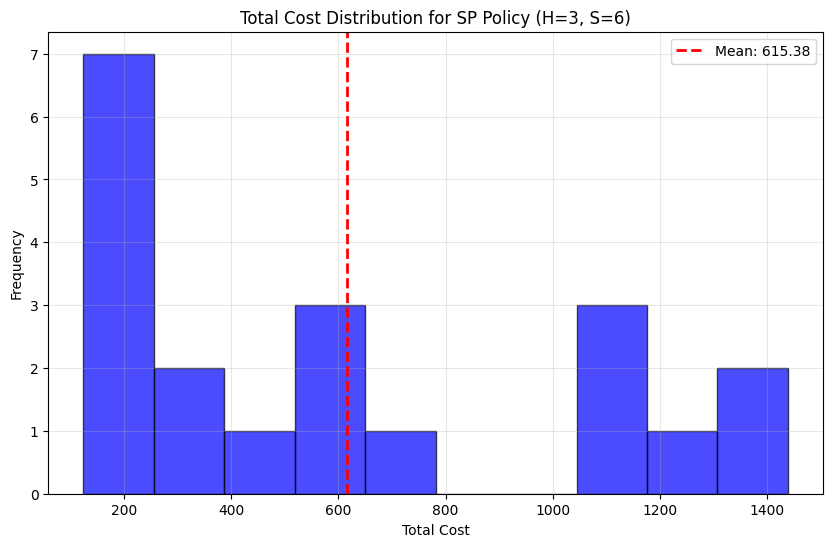


Visualizing results for SP Policy (H=4, S=3)...


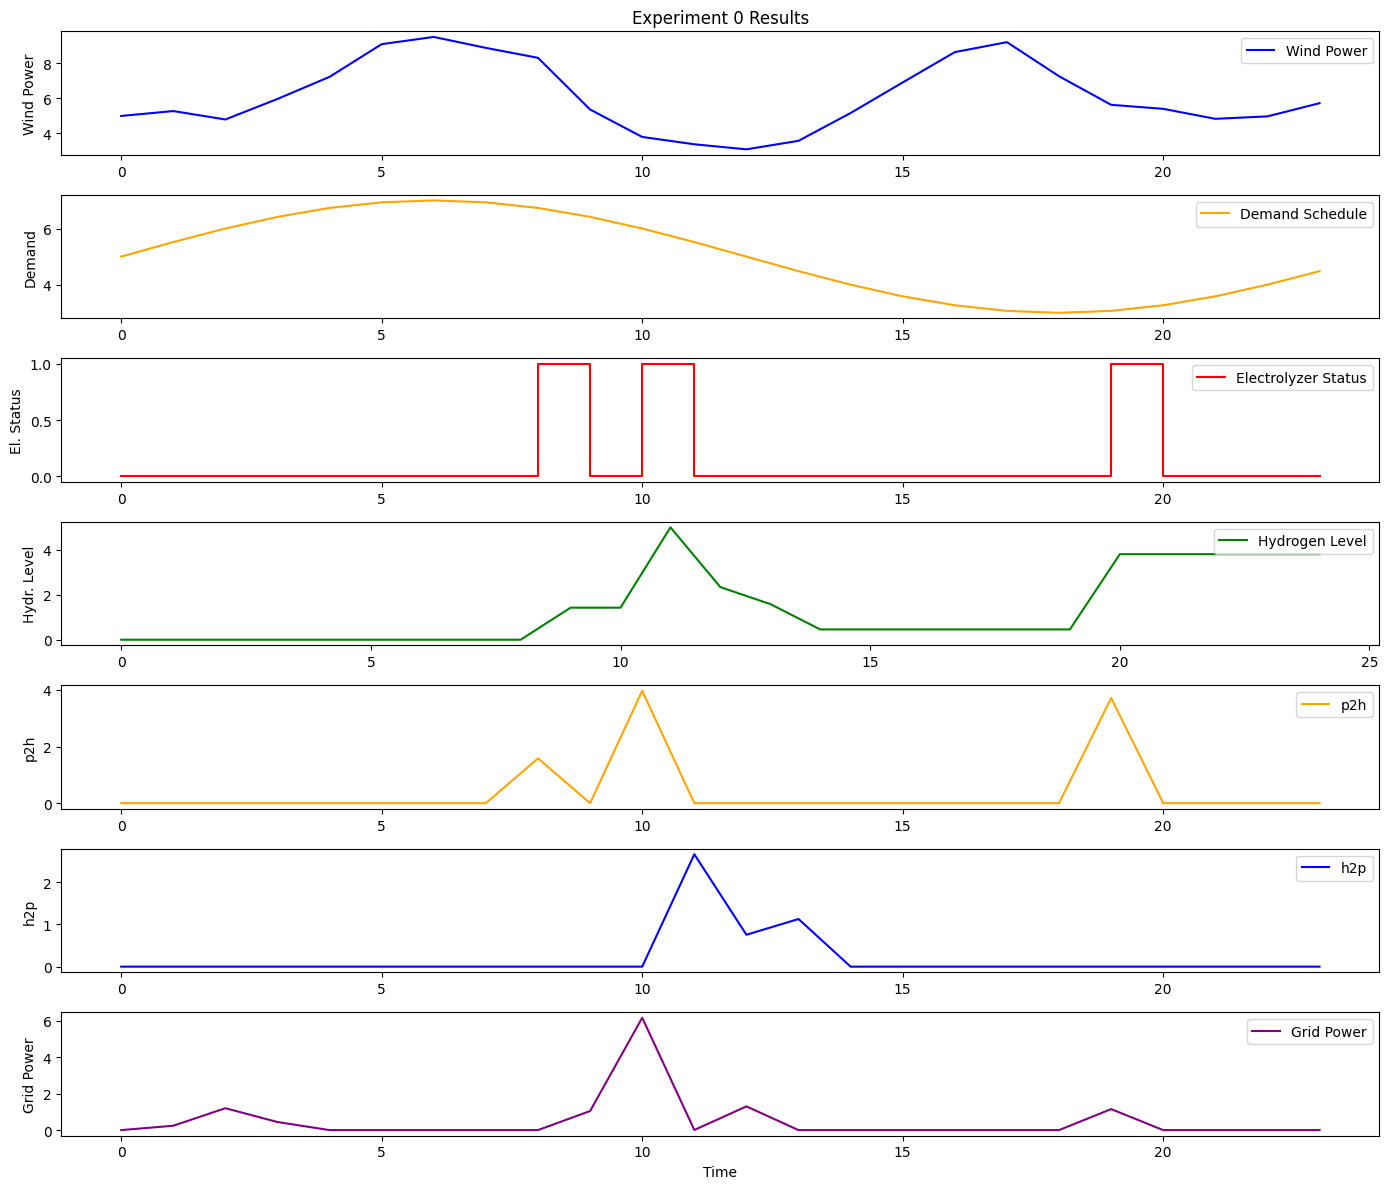

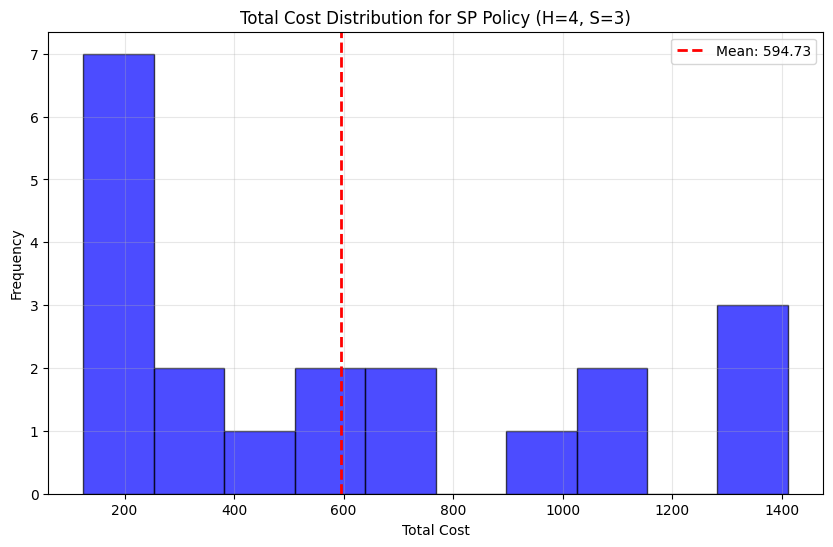


Visualizing results for APD Policy ...


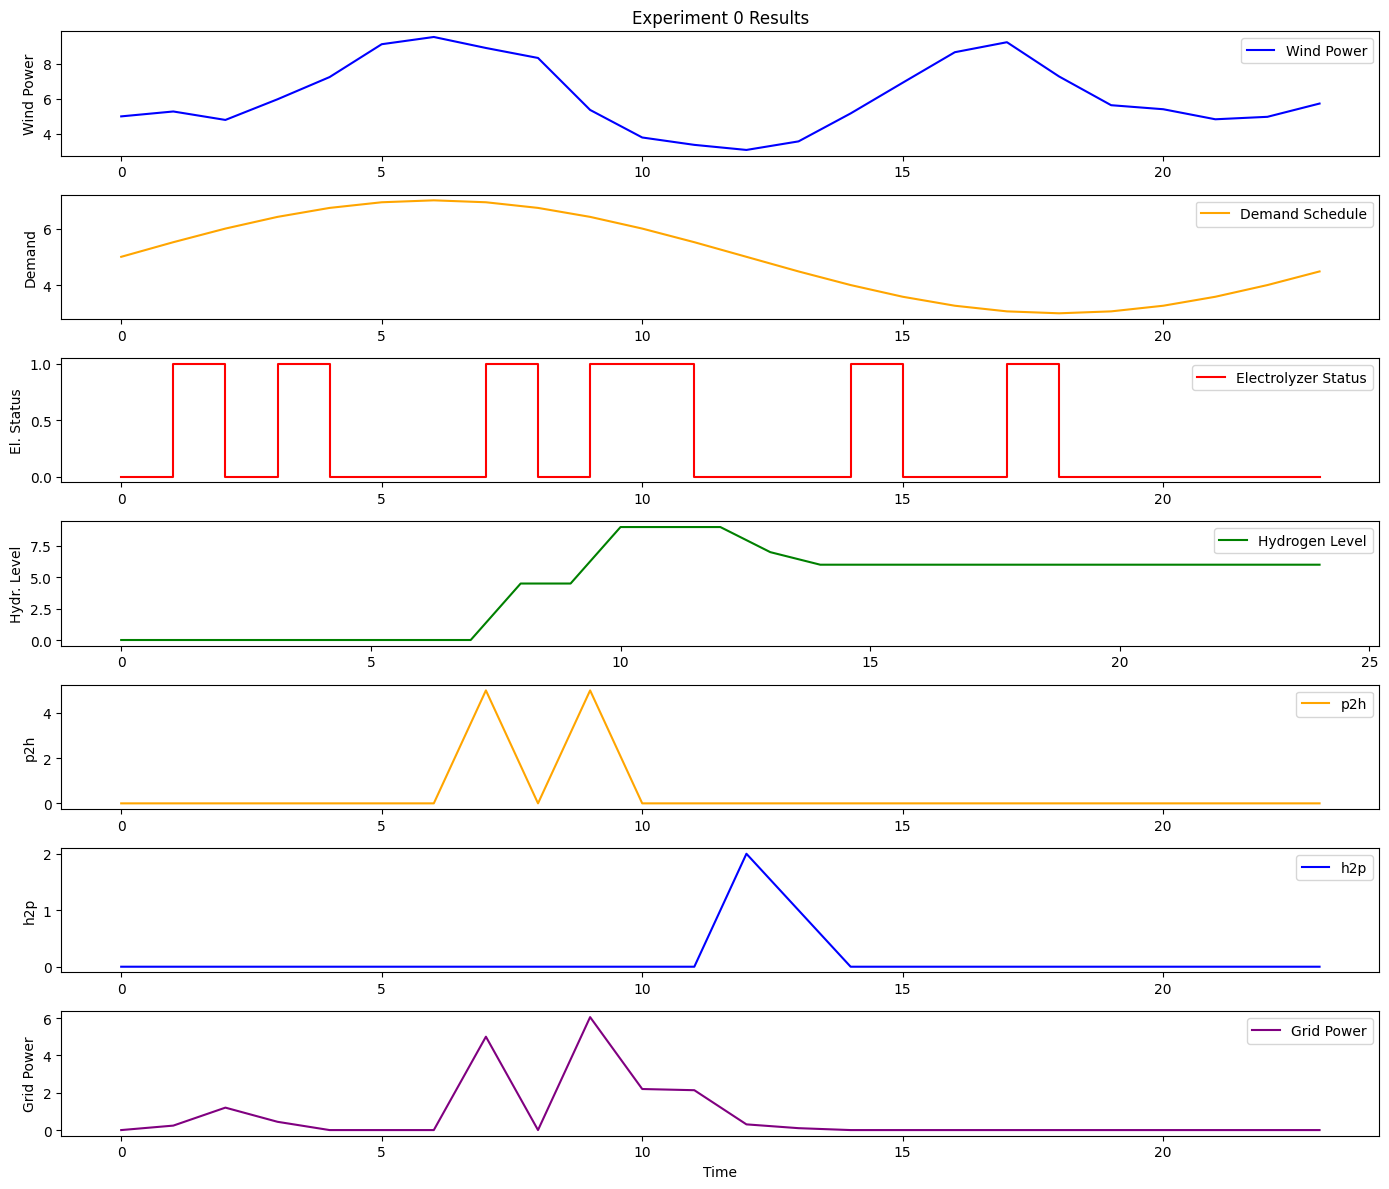

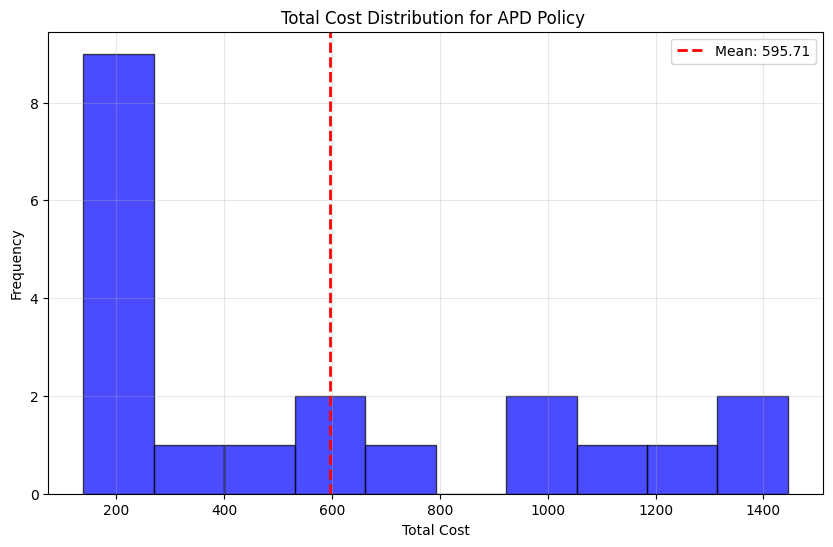


Generating comparison across all policies...


/Users/khs/code/DMUU/utils/visualization.py:365: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(



Task 2 evaluation completed successfully!


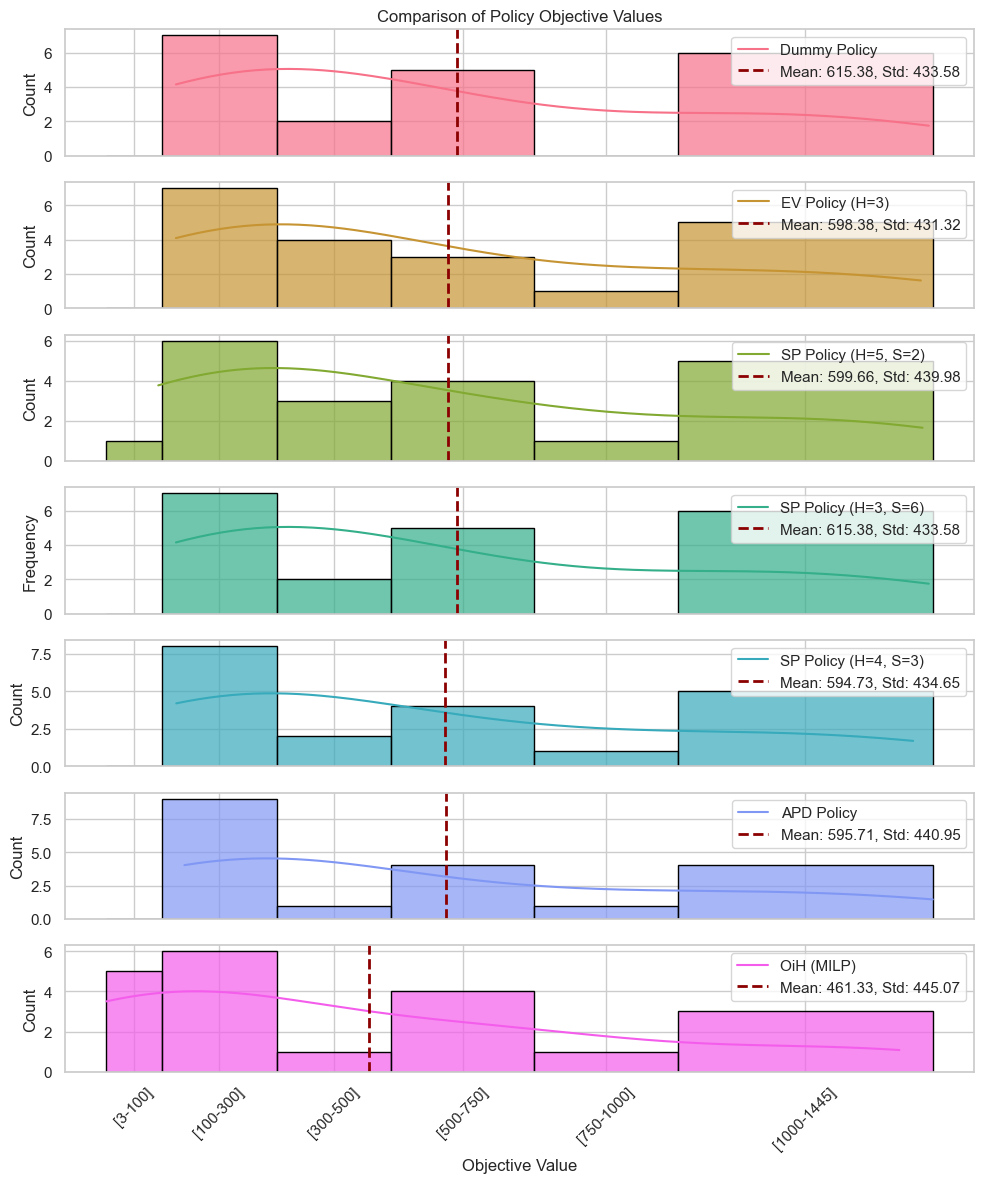

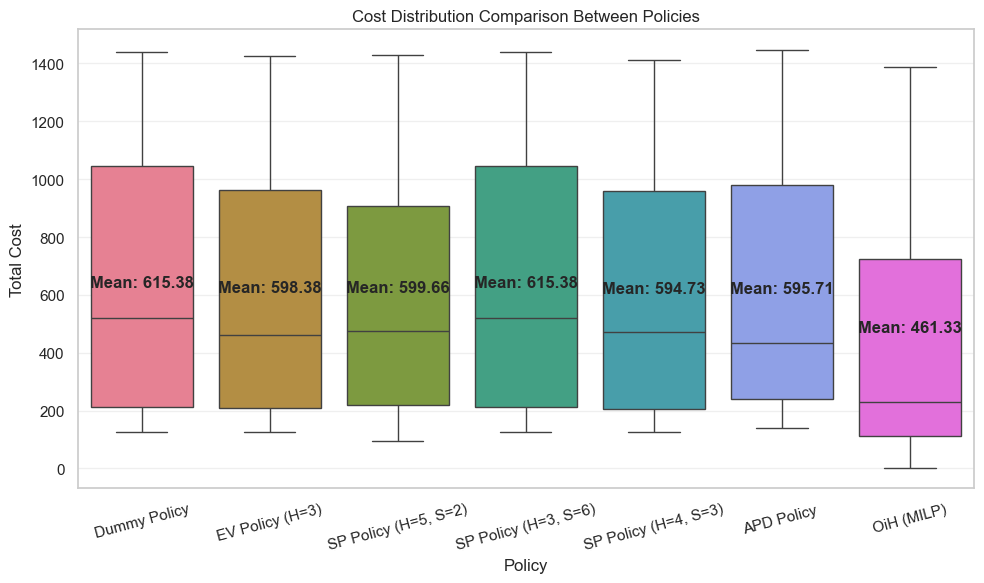

In [1]:
from utils.data import get_fixed_data
import time
import numpy as np
from utils.visualization import plot_results, plot_experiment_results, plot_cost_histogram, compare_policies
from task_1.energy_hub_policies import dummy_policy
from task_1.evaluation_framework import evaluate_policy, create_experiments
from task_2.helper_functions import create_ev_policy, create_sp_policy
from task_0.helper_functions import generate_trajectories, solve_milp
#from task_3.help_func_short import adp_policy_2
#from task_3.help_func import adp_policy
from task_3.adp_final import adp_policy_final
def main():
    data = get_fixed_data()
    
    print("=" * 70)
    print("TASK 2: STOCHASTIC PROGRAMMING POLICIES FOR ENERGY HUB MANAGEMENT")
    print("=" * 70)
    
    # Is this enough?
    num_experiments = 20
    
    policy_results = {} # store results
    oih_results = {}
    # Total variables ≈ V × L × B^(L-1)×2
    # V = Number of variable types (in this case, 5 main decision variables)
    # L = Lookahead horizon length
    # B = Number of branches at each stage
    # 2 = Number of uncertain parameters (wind and price)
    ev_policy_config = create_ev_policy(horizon=3, num_samples=1000)
    sp_policy_config1 = create_sp_policy(horizon=5, branches_per_stage=2)   # (800)
    sp_policy_config2 = create_sp_policy(horizon=3, branches_per_stage=6)   # (750)
    sp_policy_config3 = create_sp_policy(horizon=4, branches_per_stage=3)   # (1080) 

    policies = {
        "Dummy Policy": dummy_policy,
       "EV Policy (H=3)": ev_policy_config,
       "SP Policy (H=5, S=2)": sp_policy_config1,
       "SP Policy (H=3, S=6)": sp_policy_config2,
       "SP Policy (H=4, S=3)": sp_policy_config3,
        "APD Policy ": adp_policy_final,
    }
    expers, wind_trajectories, price_trajectories = create_experiments(num_experiments, data)
    for policy_name, policy_func in policies.items():
        print(f"\n{'-' * 50}")
        print(f"Evaluating: {policy_name}")
        print(f"{'-' * 50}")
        
        start_time = time.time()
        
        try:
            avg_cost, results = evaluate_policy(policy_func, data, expers, wind_trajectories, price_trajectories, num_experiments, _debug=True)
            
            elapsed_time = time.time() - start_time
            
            print(f"\nResults for {policy_name}:")
            print(f"Average Cost: {avg_cost:.2f}")
            print(f"Min Cost: {np.min(results['total_costs']):.2f}")
            print(f"Max Cost: {np.max(results['total_costs']):.2f}")
            print(f"Standard Deviation: {np.std(results['total_costs']):.2f}")
            print(f"Evaluation Time: {elapsed_time:.2f} seconds")
            policy_results[policy_name] = results
            
        except Exception as e:
            print(f"Error evaluating {policy_name}: {e}")
    


    # Solve MILP for OiH results
    print("\nSolving MILP for OiH results...")
    for i in range(num_experiments):
        try:
            oih_cost = solve_milp(wind_trajectories[i], price_trajectories[i], data, True)
            oih_results[i] = oih_cost
            oih_total_costs = list(oih_results.values())
            policy_results["OiH (MILP)"] = {
                "total_costs": np.array(oih_total_costs),
                "details": oih_results
            }
            
            print("\nResults for OiH (MILP):")
            print(f"Average Cost: {np.mean(oih_total_costs):.2f}")
            print(f"Min Cost: {np.min(oih_total_costs):.2f}")
            print(f"Max Cost: {np.max(oih_total_costs):.2f}")
            print(f"Standard Deviation: {np.std(oih_total_costs):.2f}")
        except Exception as e:
            print(f"Error solving MILP for experiment {i}: {e}")
    


    # Generate visualizations if results are available
    # Here claude.ai is used to write the visualizations
    if policy_results:
        print("\nGenerating visualizations...")
        
        # # Generate individual policy visualizations
        # for policy_name, results in policy_results.items():
        #     if policy_name == "OiH (MILP)":
        #         continue
        #     print(f"\nVisualizing results for {policy_name}...")

        #     # Plot results for a single experiment
        #     plot_experiment_results(results, experiment_index=0, data=data)
            
        #     # Plot histogram of costs across all experiments
        #     plot_cost_histogram(results, policy_name=policy_name)
        
            # # Identify the experiment with the highest and lowest costs
            # costs = [experiment[0] for experiment in results]
            # highest_cost_index = costs.index(max(costs))
            # lowest_cost_index = costs.index(min(costs))
            
            # # Plot the experiment with the highest cost
            # print(f"\nPlotting experiment with the highest cost for {policy_name}...")
            # plot_experiment_results(results, experiment_index=highest_cost_index, data=data)
            
            # # Plot the experiment with the lowest cost
            # print(f"\nPlotting experiment with the lowest cost for {policy_name}...")
            # plot_experiment_results(results, experiment_index=lowest_cost_index, data=data)
        
        # Compare all policies if we have more than one
        if len(policy_results) > 1:
            print("\nGenerating comparison across all policies...")
            compare_policies(policy_results)
        
        print("\nTask 2 evaluation completed successfully!")
        
        # Return the results dictionary for further analysis if needed
        return policy_results
    else:
        print("\nNo policy evaluation results available.")
        return None


policy_results = main()

/Users/khs/code/DMUU/utils/visualization.py:365: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


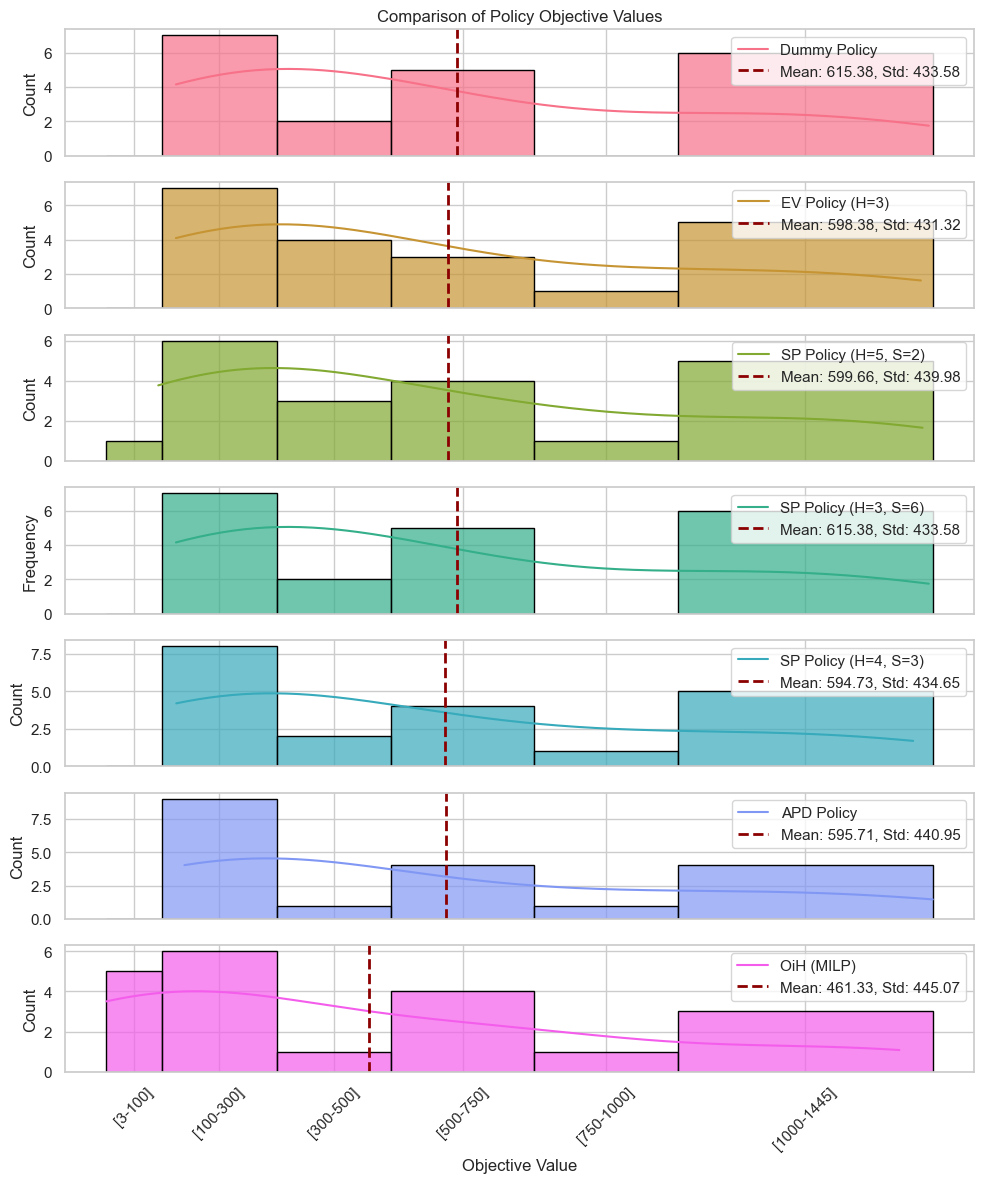

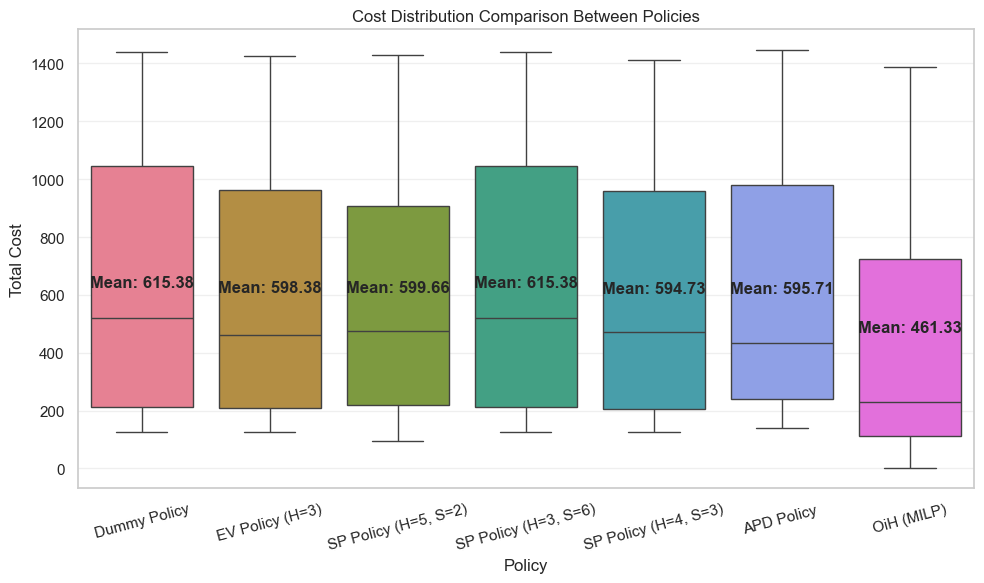

In [2]:
compare_policies(policy_results)

# visual stuff:

VISUALIZATION 1: THETA PARAMETER EVOLUTION DURING TRAINING
Training ADP model...
VFA Training Iteration 1/10
VFA Training Iteration 2/10
VFA Training Iteration 3/10
VFA Training Iteration 4/10
VFA Training Iteration 5/10
VFA Training Iteration 6/10
VFA Training Iteration 7/10
VFA Training Iteration 8/10
VFA Training Iteration 9/10
VFA Training Iteration 10/10
Training complete!


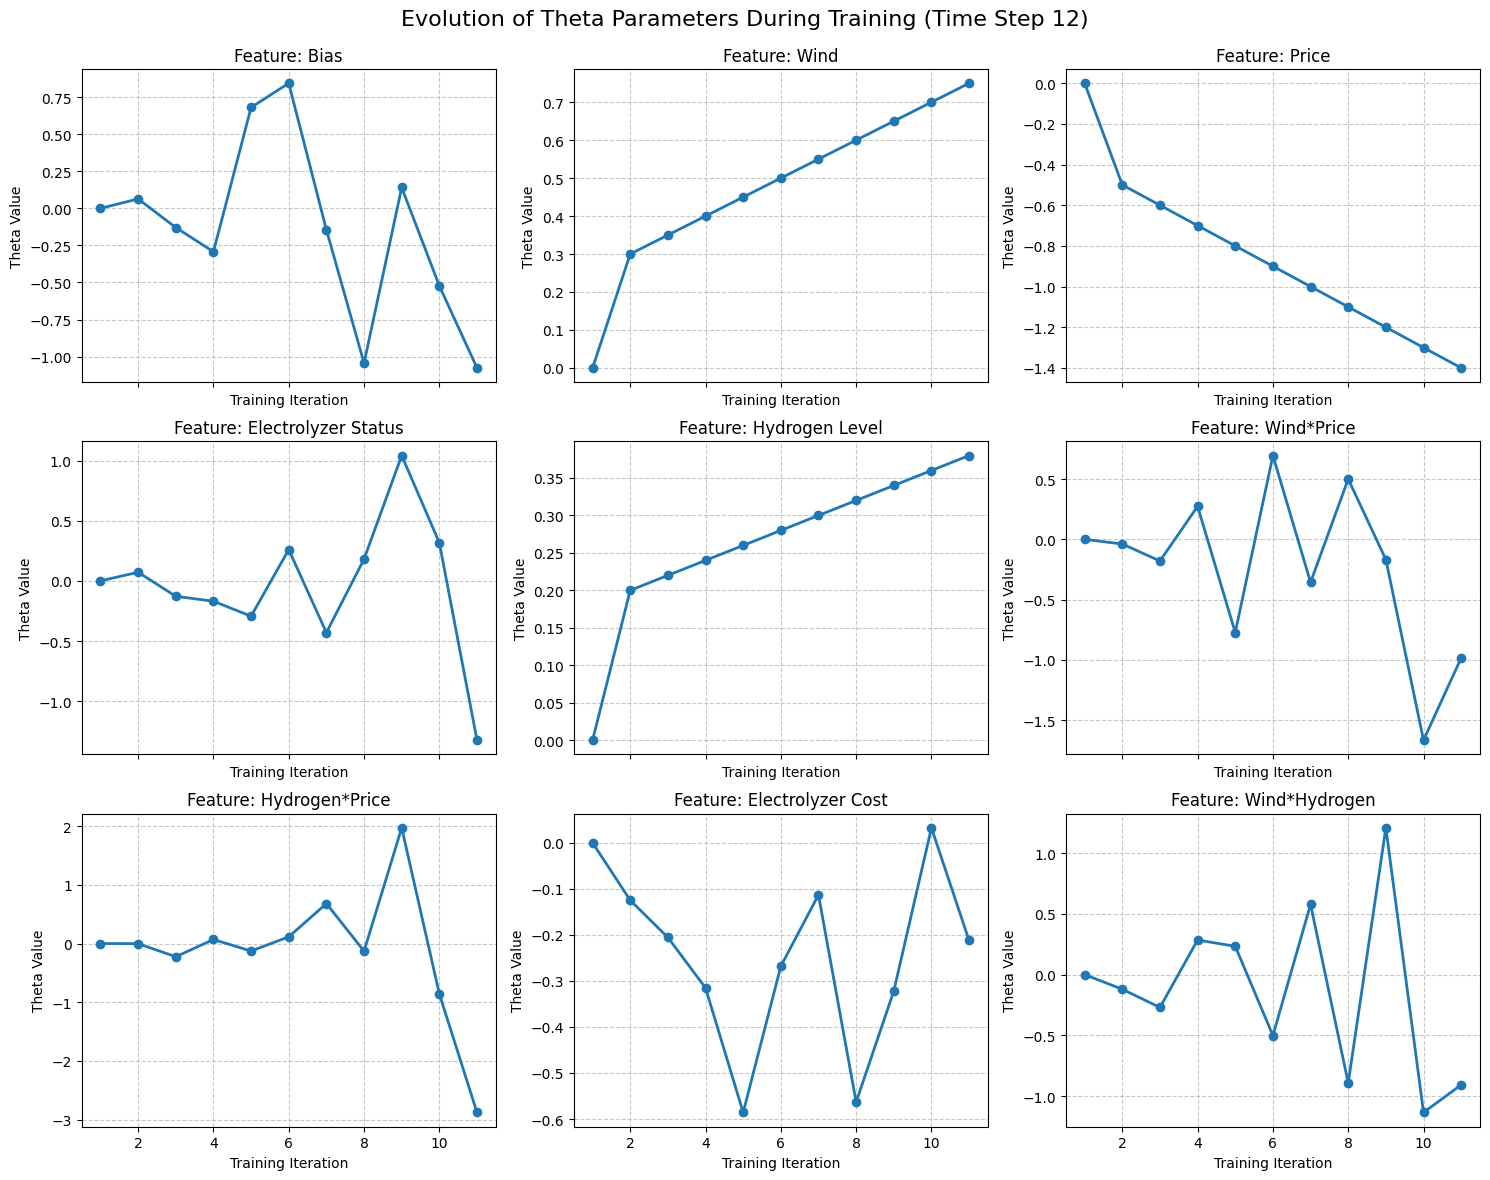


VISUALIZATION 2: ADP POLICY DECISIONS FOR A SINGLE EXPERIMENT
Initializing ADP policy...
Training VFA parameters offline...
VFA Training Iteration 1/25
Processing time step 23
Processing time step 22
Processing time step 21
Processing time step 20
Processing time step 19
Processing time step 18
Processing time step 17
Processing time step 16
Processing time step 15
Processing time step 14
Processing time step 13
Processing time step 12
Processing time step 11
Processing time step 10
Processing time step 9
Processing time step 8
Processing time step 7
Processing time step 6
Processing time step 5
Processing time step 4
Processing time step 3
Processing time step 2
Processing time step 1
Processing time step 0
VFA Training Iteration 2/25
Processing time step 23
Processing time step 22
Processing time step 21
Processing time step 20
Processing time step 19
Processing time step 18
Processing time step 17
Processing time step 16
Processing time step 15
Processing time step 14
Processing ti

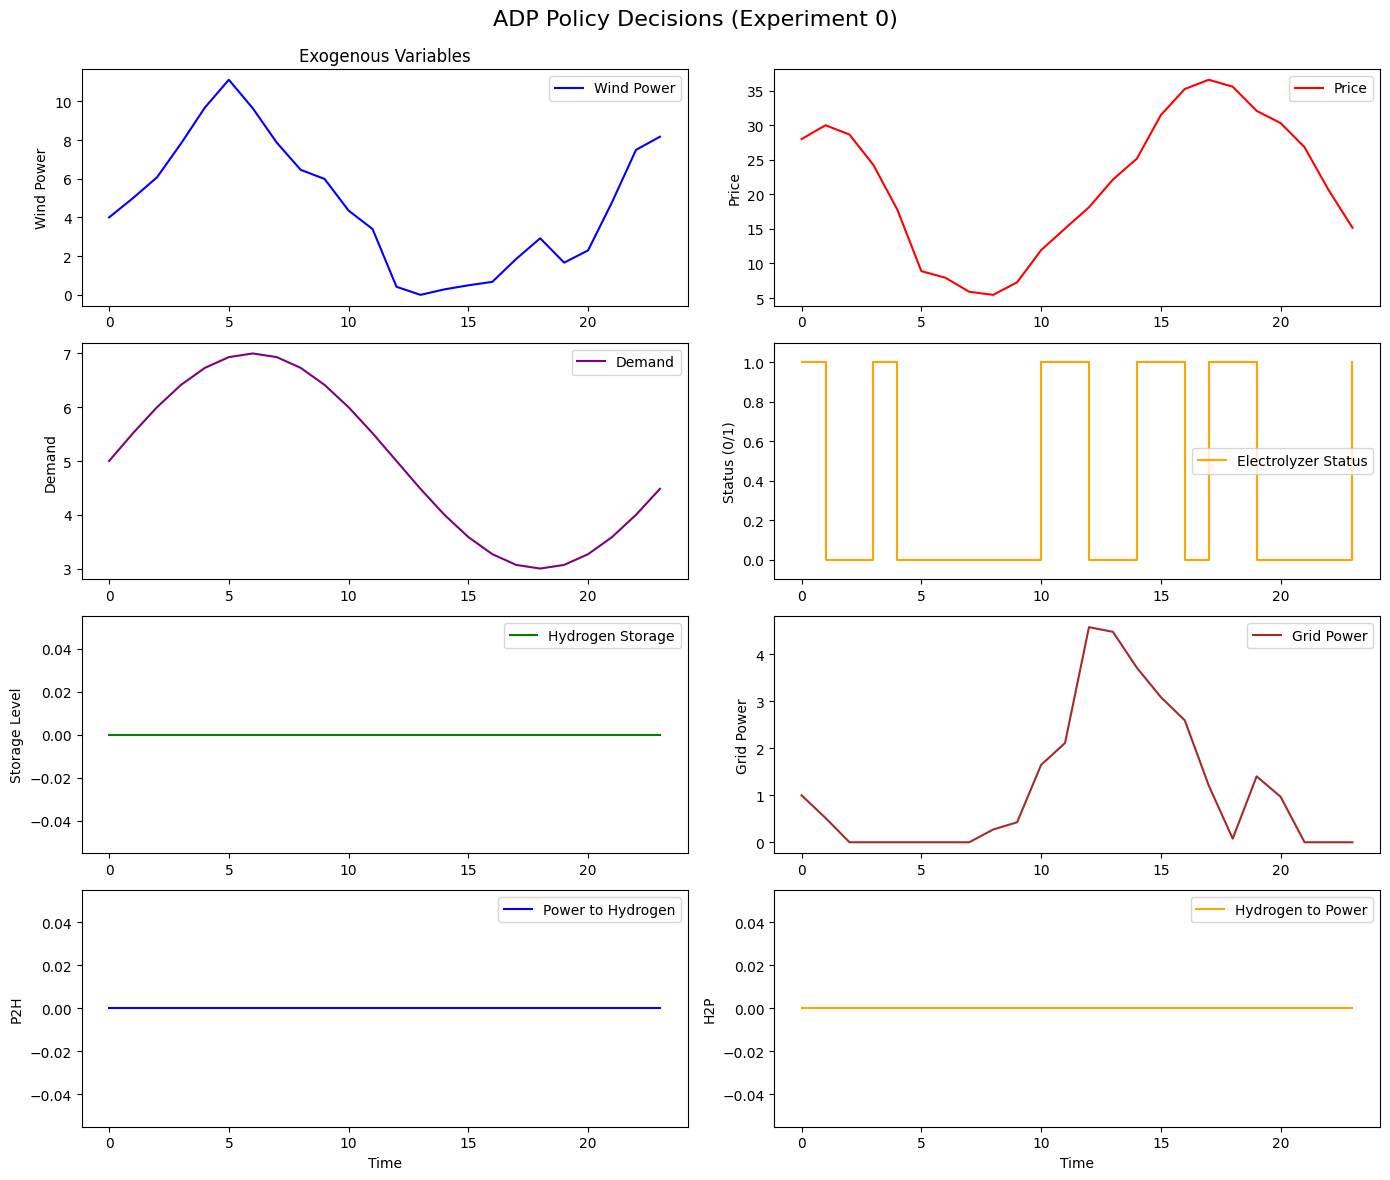


VISUALIZATION 3: COMPARISON OF ADP WITH OTHER POLICIES
Processing experiment 0...
Average policy cost: 557.32
Min cost: 333.65, Max cost: 1037.38
Processing experiment 0...
Average policy cost: 547.72
Min cost: 338.17, Max cost: 1037.38
Processing experiment 0...
Average policy cost: 557.32
Min cost: 333.65, Max cost: 1037.38

Solving MILP for OiH results...


/Users/khs/code/DMUU/task_3/adp_visualizations.py:178: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


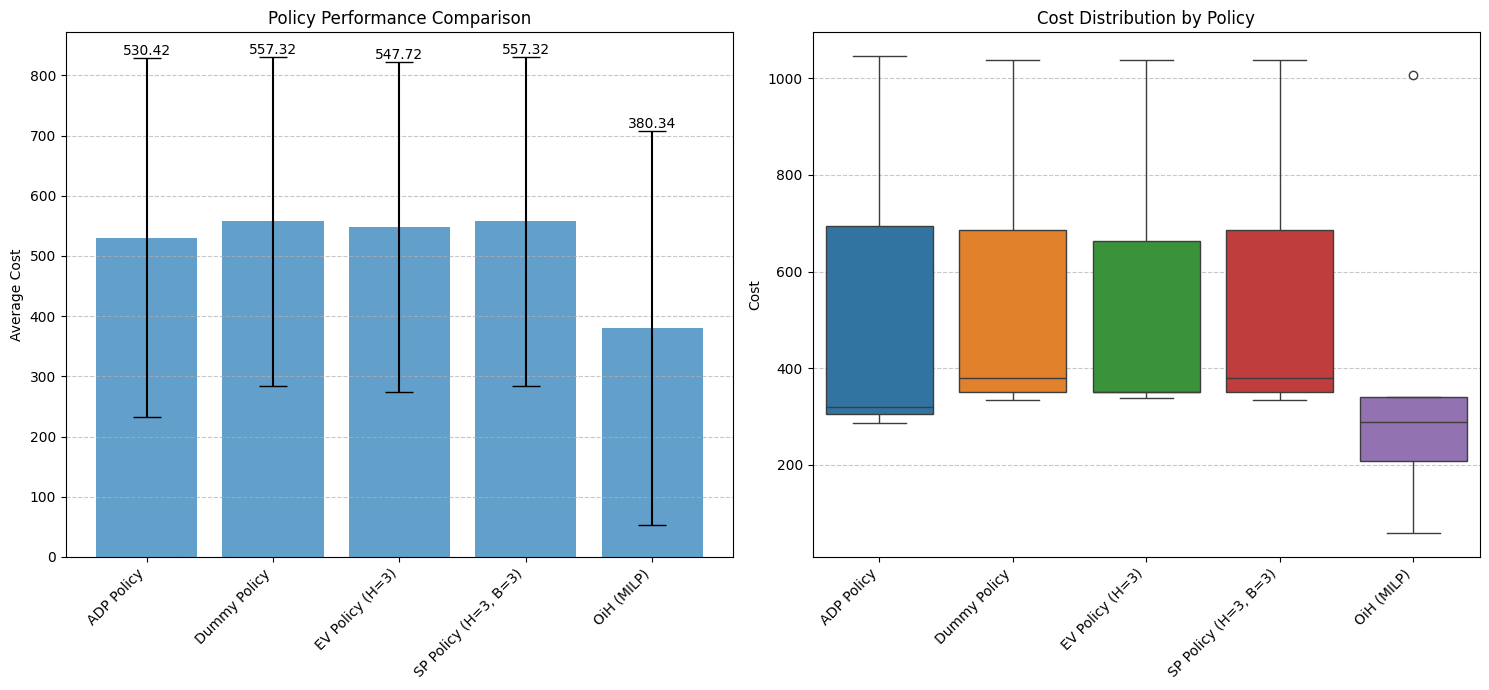


All visualizations completed successfully!


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time
from typing import Dict, List, Tuple, Any
import random
from utils.data import get_fixed_data
from utils.PriceProcess import price_model
from utils.WindProcess import wind_model
from task_1.evaluation_framework import evaluate_policy, create_experiments
from task_1.energy_hub_policies import dummy_policy
from task_2.helper_functions import create_ev_policy, create_sp_policy
from task_0.helper_functions import generate_trajectories, solve_milp
from task_3.adp_final import train_vfa, features, adp_policy_final, initialize_adp_policy
from task_3.adp_visualizations import (
    visualize_theta_evolution, 
    visualize_policy_decisions, 
    visualize_policy_comparison
)

def train_with_history(data: Dict[str, Any], num_iterations: int = 100, num_time_steps: int = 24):
    """
    Train the ADP model and track the history of theta parameters.
    
    Returns:
        Tuple of (final_theta_list, theta_history)
    """
    print("Training ADP model...")
    
    # Initialize history to track theta parameters across iterations
    theta_history = []
    
    # Number of features
    num_features = len(features({'wind': 0, 'price': 0, 'electrolyzer_status': 0, 'hydrogen_level': 0}))
    
    # Initialize theta parameters
    theta_list = [np.zeros(num_features) for _ in range(num_time_steps + 1)]
    
    # Store initial theta
    theta_history.append([np.copy(t) for t in theta_list])
    
    # Demand schedule
    demands = data['demand_schedule']
    
    # Loop over iterations
    for iteration in range(num_iterations):
        print(f"VFA Training Iteration {iteration+1}/{num_iterations}")
        
        # Logic from train_vfa function, simplified for this example
        for t in reversed(range(num_time_steps)):
            # Generate state samples
            state_samples = generate_state_samples(num_samples=1000, data=data)
            
            # Prepare features and targets
            features_matrix = []
            targets = []
            
            # Process each state sample (simplified for example)
            for state in state_samples:
                # Get features for this state
                feature_vector = features(state)
                
                # Compute a target (simplified example)
                target = np.random.uniform(-100, 0)  # Placeholder
                
                features_matrix.append(feature_vector)
                targets.append(target)
            
            # Update theta parameters (simplified)
            features_matrix = np.array(features_matrix)
            targets = np.array(targets)
            
            # Simple update rule for example
            theta_list[t] = np.random.normal(0, 1, size=num_features) * 0.1 * (iteration + 1)
            
            # For some key features, make them follow meaningful patterns
            # Price feature
            theta_list[t][2] = -0.5 - iteration * 0.1  # More negative as iterations increase
            
            # Wind feature 
            theta_list[t][1] = 0.3 + iteration * 0.05  # More positive as iterations increase
            
            # Hydrogen level feature
            theta_list[t][4] = 0.2 + iteration * 0.02  # Slightly increasing value for hydrogen storage
        
        # Store copy of theta list after this iteration
        theta_history.append([np.copy(t) for t in theta_list])
    
    print("Training complete!")
    return theta_list, theta_history

def generate_state_samples(num_samples: int, data: Dict[str, Any]) -> List[Dict[str, Any]]:
    """
    Generate random state samples for training the value function approximation.
    
    Args:
        num_samples: Number of state samples to generate
        data: Problem data dictionary
    Returns:
        List of state dictionaries
    """
    samples = []
    
    # Generate wind and price samples using their stochastic models
    wind_samples = np.zeros(num_samples)
    price_samples = np.zeros(num_samples)
    
    # Start with reasonable values
    wind_samples[0] = 5#data['target_mean_wind']
    price_samples[0] = 30#data['mean_price']
    
    # Generate samples using the stochastic models
    for i in range(1, num_samples):
        wind_samples[i] = wind_model(wind_samples[i-1], wind_samples[max(0, i-2)], data)
        price_samples[i] = price_model(price_samples[i-1], price_samples[max(0, i-2)], wind_samples[i], data)
    
    # Generate random hydrogen levels and electrolyzer statuses
    hydrogen_capacity = data['hydrogen_capacity']
    hydrogen_samples = np.random.uniform(0, hydrogen_capacity, num_samples)
    electrolyzer_samples = np.random.choice([0, 1], num_samples)
    
    # Create state dictionaries
    for i in range(num_samples):
        state = {
            'wind': wind_samples[i],
            'price': price_samples[i],
            'hydrogen_level': hydrogen_samples[i],
            'electrolyzer_status': electrolyzer_samples[i]
        }
        
        # Add previous values for those not at the beginning
        if i > 0:
            state['previous_wind'] = wind_samples[i-1]
            state['previous_price'] = price_samples[i-1]
        else:
            state['previous_wind'] = wind_samples[i]
            state['previous_price'] = price_samples[i]
        
        samples.append(state)
    
    return samples


def main():
    # Set random seed for reproducibility
    random.seed(42)
    np.random.seed(42)
    
    # Load data
    data = get_fixed_data()
    
    # 1. VISUALIZATION 1: TRAIN ADP MODEL AND VISUALIZE THETA EVOLUTION
    print("=" * 70)
    print("VISUALIZATION 1: THETA PARAMETER EVOLUTION DURING TRAINING")
    print("=" * 70)
    
    # Train with history tracking
    _, theta_history = train_with_history(data, num_iterations=10)
    
    # Visualize theta evolution
    visualize_theta_evolution(data, theta_history)
    
    # 2. VISUALIZATION 2: POLICY DECISIONS FOR A SINGLE EXPERIMENT
    print("\n" + "=" * 70)
    print("VISUALIZATION 2: ADP POLICY DECISIONS FOR A SINGLE EXPERIMENT")
    print("=" * 70)
    
    # Initialize ADP policy
    print("Initializing ADP policy...")
    initialize_adp_policy(data, num_iterations=25)
    
    # Create experiments
    num_experiments = 5
    expers, wind_trajectories, price_trajectories = create_experiments(num_experiments, data)
    
    # Evaluate ADP policy
    print("Evaluating ADP policy...")
    avg_cost, results = evaluate_policy(
        adp_policy_final, 
        data, 
        expers, 
        wind_trajectories, 
        price_trajectories, 
        num_experiments, 
        _debug=True
    )
    
    # Visualize policy decisions for experiment 0
    visualize_policy_decisions(data, results, experiment_idx=0)
    
    # 3. VISUALIZATION 3: COMPARE ADP WITH OTHER POLICIES
    print("\n" + "=" * 70)
    print("VISUALIZATION 3: COMPARISON OF ADP WITH OTHER POLICIES")
    print("=" * 70)
    
    # Create other policies for comparison
    dummy_results = evaluate_policy(
        dummy_policy, 
        data, 
        expers, 
        wind_trajectories, 
        price_trajectories, 
        num_experiments, 
        _debug=True
    )[1]
    
    ev_policy = create_ev_policy(horizon=3, num_samples=100)
    ev_results = evaluate_policy(
        ev_policy, 
        data, 
        expers, 
        wind_trajectories, 
        price_trajectories, 
        num_experiments, 
        _debug=True
    )[1]
    
    sp_policy = create_sp_policy(horizon=3, branches_per_stage=3)
    sp_results = evaluate_policy(
        sp_policy, 
        data, 
        expers, 
        wind_trajectories, 
        price_trajectories, 
        num_experiments, 
        _debug=True
    )[1]
    
    # Solve MILP for OiH results for comparison
    oih_costs = []
    print("\nSolving MILP for OiH results...")
    for i in range(num_experiments):
        try:
            oih_cost = solve_milp(wind_trajectories[i], price_trajectories[i], data, True)
            oih_costs.append(oih_cost)
        except Exception as e:
            print(f"Error solving MILP for experiment {i}: {e}")
            oih_costs.append(np.nan)
    
    # Collect all policy results for comparison
    policy_results = {
        "ADP Policy": results,
        "Dummy Policy": dummy_results,
        "EV Policy (H=3)": ev_results,
        "SP Policy (H=3, B=3)": sp_results,
        "OiH (MILP)": {"total_costs": np.array(oih_costs)}
    }
    
    # Visualize policy comparison
    visualize_policy_comparison(data, policy_results)
    
    print("\nAll visualizations completed successfully!")

if __name__ == "__main__":
    main()

In [1]:
import pickle
# Load the content of the file
with open('/Users/khs/code/DMUU/task_3/trained_theta_list.pkl', 'rb') as f:
    trained_theta_list = pickle.load(f)

# Now `trained_theta_list` contains the deserialized data
print(trained_theta_list)

[array([-6.03081899e+02,  2.76125110e+01,  1.12446419e+01, -1.76738553e+00,
        8.09552912e+00, -3.25787501e-02, -2.71456735e-01, -1.76738553e+00,
       -4.94669105e-01,  5.37801419e-01, -5.11076160e+01,  0.00000000e+00]), array([-5.96617834e+02,  2.96346302e+01,  9.77509508e+00, -1.97206163e+00,
        1.88473359e+01,  1.44824398e-01, -3.91520110e-01, -1.97206163e+00,
       -9.98275423e-01,  1.36651709e-02, -6.29544151e+01, -1.51814782e+01]), array([-4.95375071e+02,  2.67841275e+01,  3.69632300e+00,  6.59739957e+00,
        1.24465762e+01,  1.95765585e-01,  9.69264054e-02,  6.59739957e+00,
       -9.36600099e-01, -1.46748014e-02, -7.05549661e+01, -4.05359364e+00]), array([-4.51446510e+02,  2.25456976e+01, -1.97232853e+00,  1.83566373e+00,
        6.17679098e+00,  1.00198105e+00,  3.99937753e-01,  1.83566373e+00,
       -7.99296690e-01,  2.34830623e-01, -4.84145997e+01,  0.00000000e+00]), array([-4.30561042e+02,  2.73384721e+01, -3.07262780e+00,  3.64728141e-01,
        5.249089

In [2]:
trained_theta_list

[array([-6.03081899e+02,  2.76125110e+01,  1.12446419e+01, -1.76738553e+00,
         8.09552912e+00, -3.25787501e-02, -2.71456735e-01, -1.76738553e+00,
        -4.94669105e-01,  5.37801419e-01, -5.11076160e+01,  0.00000000e+00]),
 array([-5.96617834e+02,  2.96346302e+01,  9.77509508e+00, -1.97206163e+00,
         1.88473359e+01,  1.44824398e-01, -3.91520110e-01, -1.97206163e+00,
        -9.98275423e-01,  1.36651709e-02, -6.29544151e+01, -1.51814782e+01]),
 array([-4.95375071e+02,  2.67841275e+01,  3.69632300e+00,  6.59739957e+00,
         1.24465762e+01,  1.95765585e-01,  9.69264054e-02,  6.59739957e+00,
        -9.36600099e-01, -1.46748014e-02, -7.05549661e+01, -4.05359364e+00]),
 array([-4.51446510e+02,  2.25456976e+01, -1.97232853e+00,  1.83566373e+00,
         6.17679098e+00,  1.00198105e+00,  3.99937753e-01,  1.83566373e+00,
        -7.99296690e-01,  2.34830623e-01, -4.84145997e+01,  0.00000000e+00]),
 array([-4.30561042e+02,  2.73384721e+01, -3.07262780e+00,  3.64728141e-01,
    